## 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

## 2. Importing data files

### 2.1 Backup of application and previous application file

In [2]:
df_application_backup = pd.read_csv("application_data.csv")
df_Previous_backup = pd.read_csv("previous_application.csv")

FileNotFoundError: [Errno 2] File b'application_data.csv' does not exist: b'application_data.csv'

### 2.2  importing Application file

In [ ]:
df_application = pd.read_csv("application_data.csv")
df_application.head()

### 2.3 importing Previous application

In [ ]:
df_previous = pd.read_csv("previous_application.csv")
df_previous.head()

## 3. Checking structure of data in Application file

In [ ]:
print('Size of application_data', df_application.shape)

In [ ]:
df_application.columns.values

In [ ]:
df_application.info(verbose= True)

In [ ]:
df_application.describe()

## 4. Missing Values and Data Quality check

### 4.1 Percentage of missing values columnwise

In [ ]:
100*df_application.isnull().sum()/len(df_application)


### 4.2 Removing coulmns 

###### 4.2.1Removing coulmns with high missing percentage 

In [ ]:
df_application.drop(df_application.columns[(100*df_application.isnull().sum()/len(df_application))>=50], axis=1, inplace= True)

###### 4.2.2 Removing colums which are not important for analysis

In [ ]:
df_application = df_application.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 
       'LIVE_CITY_NOT_WORK_CITY'],axis=1)
df_application.head()

In [ ]:
# Checking the column name and shape after dropping columns
print(df_application.columns)
print('Size of application_data', df_application.shape)

#### 4.3 Missing Value Imputation

###### 4.3.1 Getting columns having missing values

In [ ]:
print(df_application.columns[100*df_application.isnull().sum()/len(df_application) > 0].tolist())

###### 4.3.1 Getting continuous and categorical columns

In [ ]:
# Columns having <=8 and OCCUPATION_TYPE,ORGANIZATION_TYPE are categorical columns others are continuous columns
df_application.nunique().sort_values()

In [ ]:
#plotting Box plot to get outliers in order to get the values for outliers in order get imputing values for variables.

plt.figure(1,figsize=(15,8)) 

# create 1st subplot:
plt.subplot(2,2,1) 
plt.title('Annuity Amount')
sns.boxplot(y=df_application["AMT_ANNUITY"])

# cretae 2nd subplot:
plt.subplot(2,2,2) 
plt.title('Loan Amount')
sns.boxplot(y=df_application["AMT_GOODS_PRICE"])

# cretae 3rd subplot:
plt.subplot(2,2,3)
plt.title('Family Members')
sns.boxplot(y=df_application["CNT_FAM_MEMBERS"])


# Getting mean and medial for all 4 variables 
print (df_application["AMT_ANNUITY"].aggregate(['mean', 'median']))
print(df_application["AMT_GOODS_PRICE"].aggregate(['mean', 'median']))
print(df_application["CNT_FAM_MEMBERS"].aggregate(['mean', 'median']))


##### Imputation Menthod
- ###### As per Box plot its clearly visible that AMT_ANNUITY is having less ouliers where as AMT_GOODS_PRICE is having more outlires, hence missing values can br imputed as below:

- ###### AMT_ANNUITY is having more outlires so missing values can be imputed with median value which is 24903

- ###### AMT_GOODS_PRICE is having more outlires so missing values can be imputed with median value which is 450000

- ###### CNT_FAM_MEMBERS is having less outlires so missing values can be imputed with mean value which is 2 after rounding off.


###### 4.3.3 Categorical column

In [ ]:
# NAME_TYPE_SUITE column imputation
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_TYPE_SUITE',data=df_application)

print(df_application.NAME_TYPE_SUITE.mode())

In [ ]:
# OCCUPATION_TYPE column imputation
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE',data=df_application)

print(df_application.OCCUPATION_TYPE.mode())

##### Imputation Method:
- ###### For Categorical column we can impute missing values with value of mode:

- ###### For NAME_TYPE_SUITE missing values should be imput with "Unaccompanied"

- ###### For OCCUPATION_TYPE missing values should be imput with "Laborers"

### 4.4 Checking Datatype and converting

###### 4.4.1 Checking Datatype

In [ ]:
df_application.dtypes

###### 4.4.2 Converting datatype

In [ ]:
# converting DAYS_REGISTRATION and CNT_FAM_MEMBERS column datatype from Float64 to int64 as these cannot be float
df_application['DAYS_REGISTRATION']= df_application['DAYS_REGISTRATION'].astype('int64')

# Removing rows for which CNT_FAM_MEMBERS values are missing, as these are very less(.000650%),beacuse for missing values while converting datatype it is throwing error.
df_application.dropna(subset=['CNT_FAM_MEMBERS'], inplace= True)
df_application['CNT_FAM_MEMBERS']= df_application['CNT_FAM_MEMBERS'].astype('int64')

# Removing rows for which DAYS_LAST_PHONE_CHANGE values are missing, as these are very less(0.000325%),beacuse for missing values while converting datatype it is throwing error.
df_application.dropna(subset=['DAYS_LAST_PHONE_CHANGE'], inplace= True)
df_application['DAYS_LAST_PHONE_CHANGE']= df_application['DAYS_LAST_PHONE_CHANGE'].astype('int64')

In [ ]:
df_application.dtypes

###### 4.4.3 converting negative values of columns to postive values

In [ ]:
# Converting negative values of DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH as it should be in positve
cols_negative = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for i in cols_negative:
    df_application[i] = df_application[i].apply(lambda x: round(abs(x)))

In [ ]:
df_application.head()

### 4.5 Check for outliers

###### 4.5.1 AMT_INCOME_TOTAL

In [ ]:

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df_application["AMT_INCOME_TOTAL"])


plt.subplot(2,2,2) 
sns.distplot(df_application["AMT_INCOME_TOTAL"])


# After removing outliers
plt.subplot(2,2,3)
sns.boxplot(df_application[df_application["AMT_INCOME_TOTAL"]<800000]["AMT_INCOME_TOTAL"])
plt.show()


###### Outlier observation: 
`As per boxplot and distplot AMT_INCOME_TOTAL>800000 are outliers`

###### 4.5.2 AMT_CREDIT

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df_application["AMT_CREDIT"])
plt.title('Credit Amount')


plt.subplot(2,2,2) 
sns.distplot(df_application["AMT_CREDIT"])


# After removing outliers
plt.subplot(2,2,3)
sns.boxplot(df_application[df_application["AMT_CREDIT"]<2300000]["AMT_CREDIT"])
plt.show()

###### Outlier observation: 
`As per boxplot and distplot AMT_CREDIT>2300000 are outliers`

###### 4.5.3 AMT_ANNUITY

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(y=df_application["AMT_ANNUITY"])
plt.title('Annuity Amount')

# Imputimg Null values with median to draw distplot
plt.subplot(2,2,2)
df_application['AMT_ANNUITY'].fillna((df_application['AMT_ANNUITY'].median()), inplace=True) 
sns.distplot(df_application["AMT_ANNUITY"])

# After removing outliers
plt.subplot(2,2,3)
sns.boxplot(df_application[df_application["AMT_ANNUITY"]<80000]["AMT_ANNUITY"])
plt.title('Annuity Amount')
plt.show()

###### Outlier observation: 
`As per boxplot and distplot AMT_ANNUITY>80000 are outliers`

###### 4.5.4 AMT_GOODS_PRICE

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(y=df_application["AMT_GOODS_PRICE"])
plt.title('Loan Amount')

# Imputimg Null values with median to draw distplot
plt.subplot(2,2,2)
df_application['AMT_GOODS_PRICE'].fillna((df_application['AMT_GOODS_PRICE'].median()), inplace=True) 
sns.distplot(df_application["AMT_GOODS_PRICE"])

# After removing outliers

plt.subplot(2,2,3)
sns.boxplot(df_application[df_application["AMT_GOODS_PRICE"]<1850000]["AMT_GOODS_PRICE"])
plt.title('Loan Amount')
plt.show()

###### Outlier observation: 
`As per boxplot and distplot AMT_GOOD_PRICE>1850000 are outliers`


###### 4.5.5 DAYS_BIRTH

In [ ]:
sns.boxplot(x=df_application['DAYS_BIRTH'])

###### Outlier observation: 
`As per boxplot there are no outliers for DAYS_BIRTH`

### 4.6 Binning

###### 4.6.1 Binning  'AMT_INCOME_TOTAL' based on quantile

In [ ]:
df_application['AMT_INCOME_TOTAL'].describe()

In [ ]:
# Binning based quantiles
df_application['Income_lable']= pd.cut(df_application['AMT_INCOME_TOTAL'],[25649.999,112500.0,147150.0,202500.0,117000000.0],labels = ['Poor','Low', 'medium', 'High'])
df_application

In [ ]:
# Visualization for Binning column
x,y = 'Income_lable', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

###### 4.6.1 Binning  'DAYS_BIRTH' 

In [ ]:
df_application['DAYS_BIRTH']= df_application['DAYS_BIRTH']/356
df_application['DAYS_BIRTH']= df_application['DAYS_BIRTH'].astype('int64')
df_application['Age']= pd.cut(df_application['DAYS_BIRTH'],[0,30,50,70],labels = ['Young','Adult','Old'])
df_application.Age

In [ ]:
x,y = 'Age', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
df1

## 5. Analysis

### 5.1 Imbalance percentage

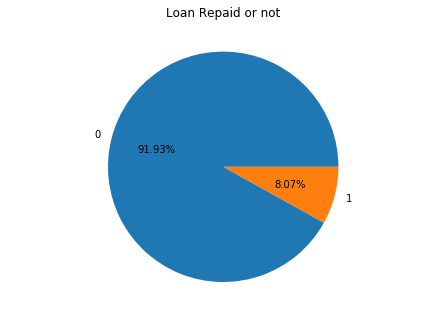

In [33]:
temp = df_application["TARGET"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(temp.values, labels= temp.index,autopct='%1.2f%%')
plt.title('Loan Repaid or not')
plt.show()

`Its highly imbalance as for Non Defaulters it's very high 91.93% and for Defaulters are only 8.07%`

### 5.2 Dividing dataset in two dataframe 

- ###### With Target Value= 1

- ###### With Target value= 0

In [34]:
df_0= df_application[df_application['TARGET']==0]
df_1 = df_application[df_application['TARGET']==1]

In [35]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,Income_lable,Age
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,47,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,School,0.622246,828,High,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,Government,0.555912,815,Poor,Old
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,53,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,Business Entity Type 3,0.650442,617,Low,Old
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,Religion,0.322738,1106,Low,Old
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,47,1588,4970,477,1,1,1,1,1,0,Laborers,2,2,2,Other,0.354225,2536,Poor,Adult


In [36]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,Income_lable,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,Business Entity Type 3,0.262949,1134,medium,Young
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,52,2628,6573,1827,1,1,0,1,0,0,Cooking staff,1,3,2,Business Entity Type 3,0.548477,161,Poor,Old
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,49,1262,1182,1029,1,1,0,1,0,0,Laborers,2,2,2,Business Entity Type 3,0.306841,1075,medium,Adult
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,37,3597,45,4409,1,1,1,1,1,0,Sales staff,2,3,3,Self-employed,0.674203,1480,Low,Adult
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,69,365243,5391,4199,1,0,0,1,0,0,NaN,2,2,2,XNA,0.023952,0,Poor,Old


### 5.3 Univariate analysis for Categorical variables with respect to TARGET

###### 5.3.1 Income sources of Applicant's in terms of loan is repayed or not in %

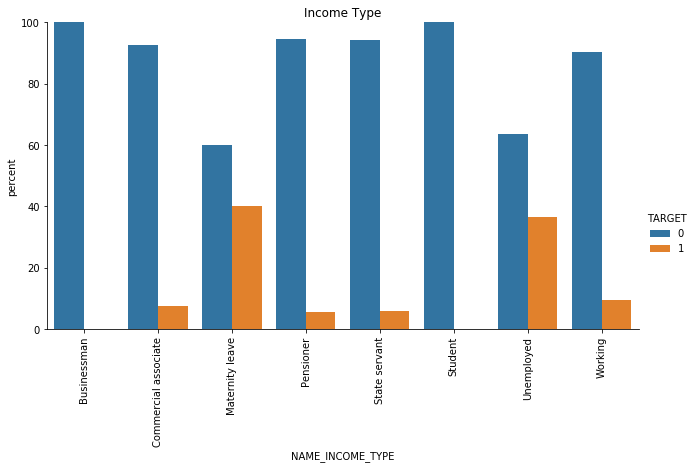

,NAME_INCOME_TYPE,TARGET,percent
0,Businessman,0,100.000000
1,Commercial associate,0,92.515534
2,Commercial associate,1,7.484466
3,Maternity leave,0,60.000000
4,Maternity leave,1,40.000000
5,Pensioner,0,94.613634
6,Pensioner,1,5.386366
7,State servant,0,94.245035
8,State servant,1,5.754965
9,Student,0,100.000000


In [37]:

x,y = 'NAME_INCOME_TYPE', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.title('Income Type')
plt.show()

df1


###### Observation:
`1) 100% Businessmen and students are paying loan amount on time or we can say do not have any payment difficulties`

`2) 40% of Maternity Leave and 36.36% of Unemployed are Defaulters or have payment difficulties`

`3) Most of the people who are working as Commercial associate or pensioner or state servant or belong to working class are paying their installment on time`

###### 5.3.2 Family Status of Applicant's in terms of loan is repayed or not in %

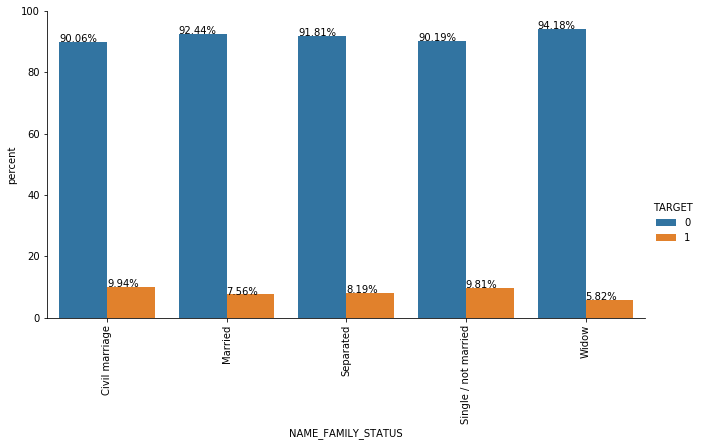

In [38]:
x,y = 'NAME_FAMILY_STATUS', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

###### Observation:
`from the graph we can observer all the results are almost same so we cannot get defaulter pattern from family status column`

###### 5.3.3 Occupation of Applicant's in terms of loan is repayed or not in %

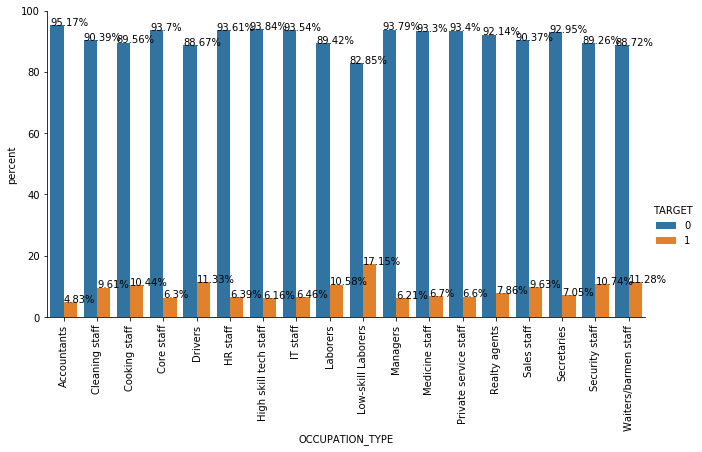

In [39]:
x,y = 'OCCUPATION_TYPE', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

###### Observation:
-   ##### let us take 10% as the threshold limit below which bank is allowed to take risk and more than that its an risk to give loan
-   ##### Considering people in occupataion where they are facing issues in payment are Coocking staff, Drivers, Laborers, Low-skill Laboures, Security staff, waiters/barmen staff 
-   ##### All other occupation type is able to pay on time
-   ##### People working as Accountant are repaying their loan amount on time

###### 5.3.4 Gender of applicatns  in terms of loan paid or not

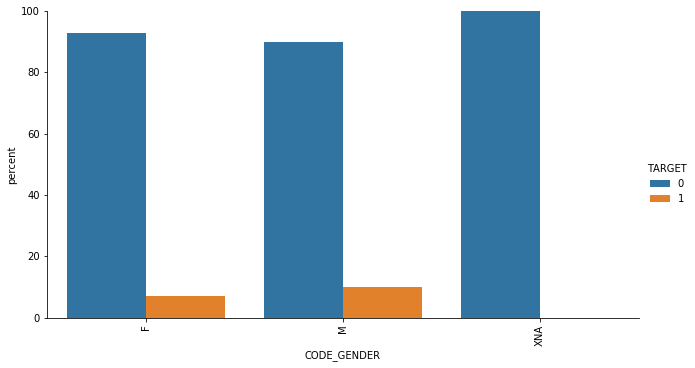

,CODE_GENDER,TARGET,percent
0,F,0,93.000637
1,F,1,6.999363
2,M,0,89.857887
3,M,1,10.142113
4,XNA,0,100.000000


In [40]:
x,y = 'CODE_GENDER', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.show()
df1

###### Observation:
-   ##### XNA's are not facing any issues in payment. 100% of XNA are paying loan
-   ##### 93% of Male applier are not having issue in paying loan
-   ##### Hence Mail and XNA are able to pay the loan amount.

###### 5.3.5 Type of loan applied in terms of loan is paid or not

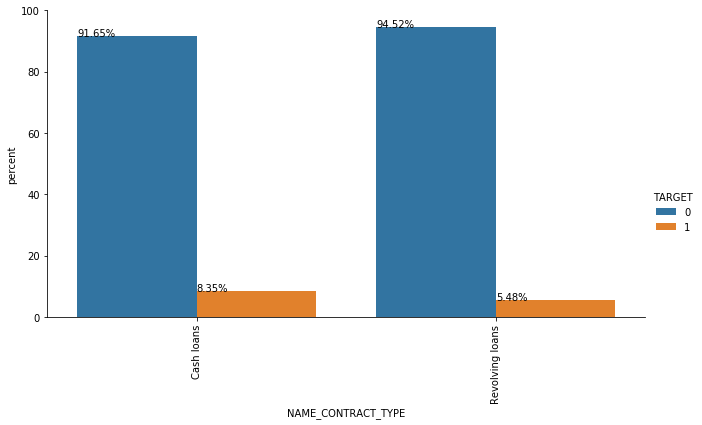

In [41]:
x,y = 'NAME_CONTRACT_TYPE', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

###### Observation:
-   ##### 94.52 % of Revolving loans and 91.65% of Cash loan is getting paid without any difficulties. 
-   ##### Revolving Loan are getting paid more than cash loans 

###### 5.3.6 Education of Applicant's in terms of loan is paid or not

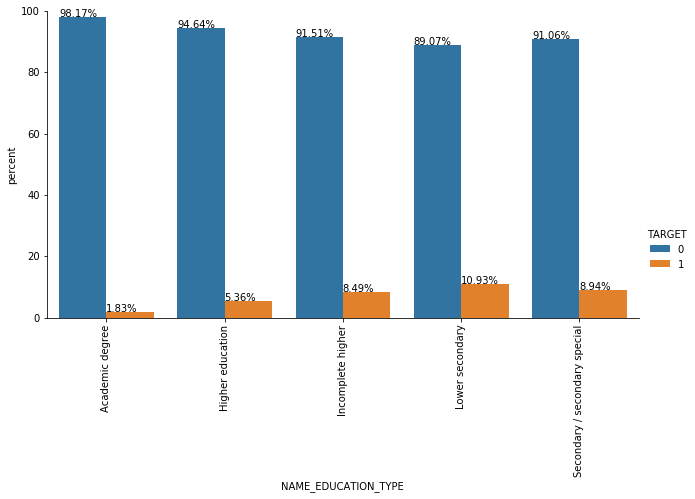

In [42]:
x,y = 'NAME_EDUCATION_TYPE', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

###### Observation:
-   ##### People having lower secondry education are facing issues in payment
-   ##### Peolple having academic degree are not facing much issue in payemnt only 1.83% are facing issue in paying loan.

###### 5.3.7 owning CAR or Reality in terms of loan is paid or not

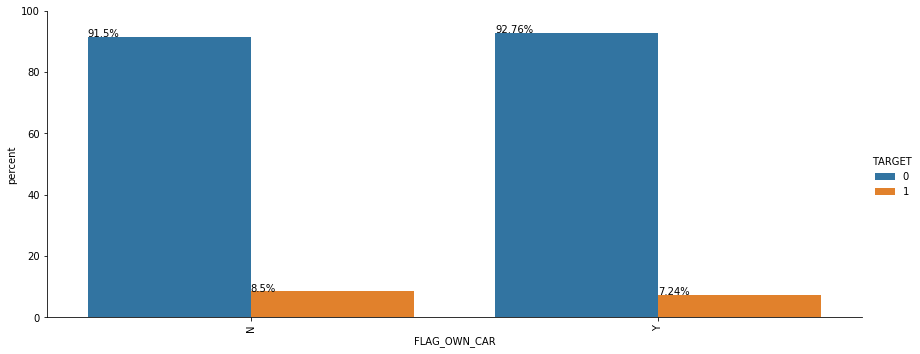

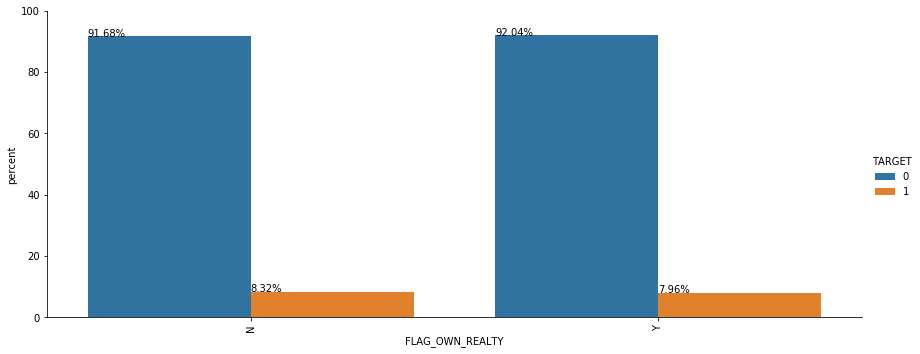

In [43]:
# Owning Car
x,y = 'FLAG_OWN_CAR', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=20/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Owning Realty

x,y = 'FLAG_OWN_REALTY', 'TARGET'

df1 = df_application.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=20/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

###### Observation:
-   ##### People owning car or Realty are having around same ratio in case of facing issue and paying back loan amount

### 5.4 Multi-Varient analysis for Categorical Variables with respect to TARGET

### 5.4.1 Below count graphs are on on following columns
-    `Age groups`
-    `Family Status`
-    `Income Type`
-    `Target (able to pay loan emi on time)`


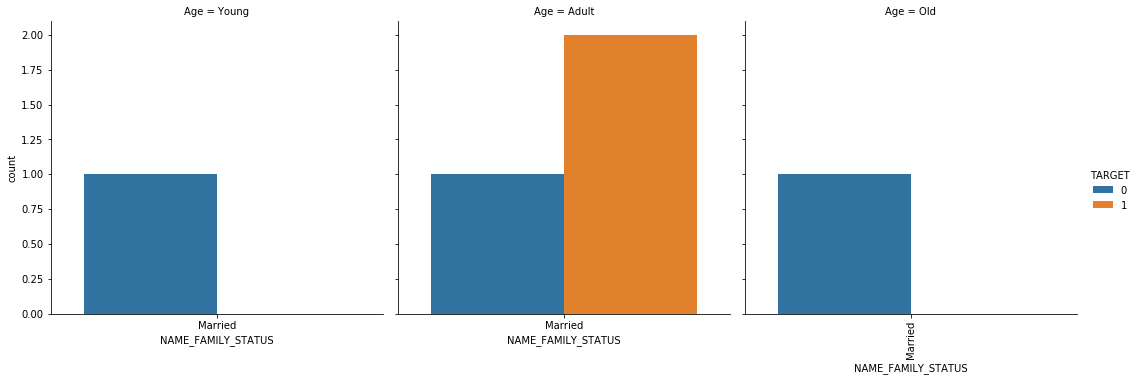

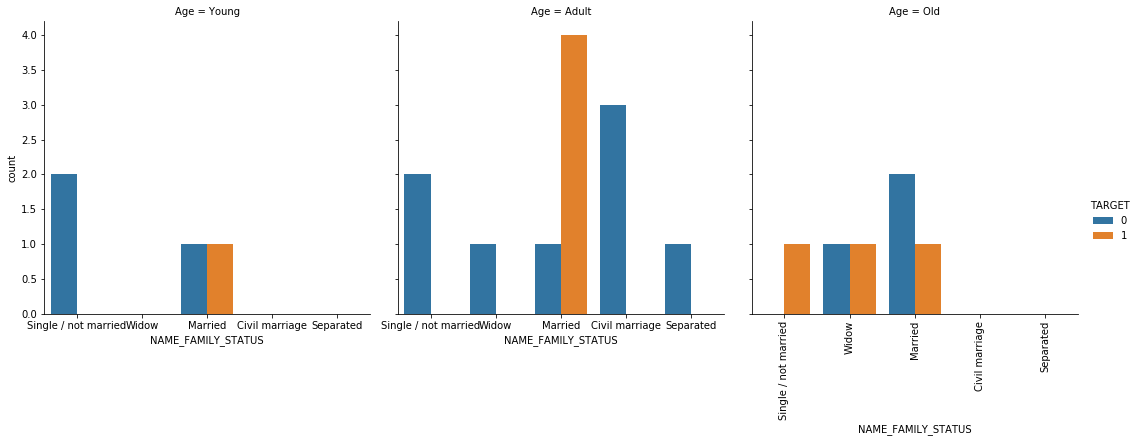

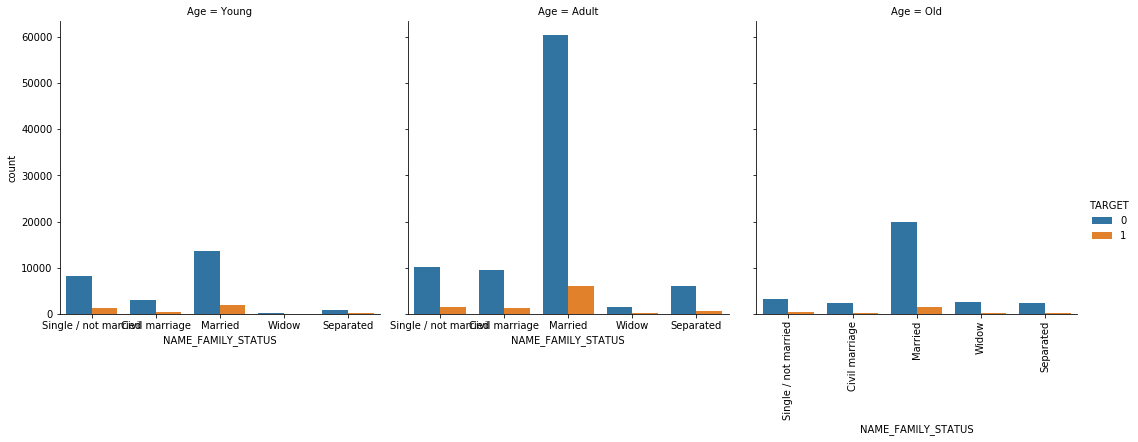

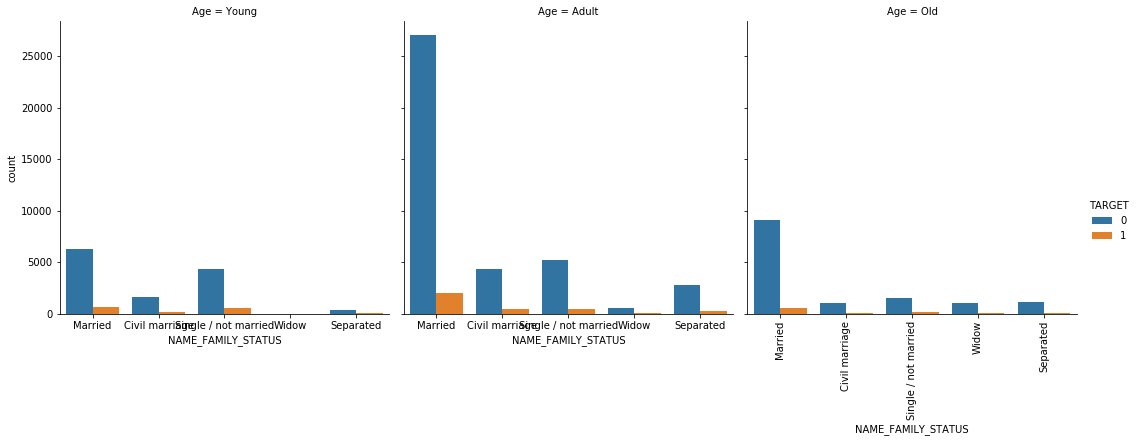

In [44]:
income_type=['Maternity leave','Unemployed','Working','Commercial associate']

for i in income_type:
    g = sns.catplot(x='NAME_FAMILY_STATUS', hue='TARGET', col= 'Age',col_wrap=3,kind='count',data=df_application[df_application['NAME_INCOME_TYPE']==i],aspect=1)
    plt.xticks(rotation=90)
    plt.show()
    

#### Above count graphs are on on following columns
-    `Age groups`
-    `Family Status`
-    `Income Type`
-    `Target (able to pay loan emi on time)`

#### Observations
1) Married people having income type as 'Maternity leave','Unemployed' and in age group of 30-50 (Adult) are risk to give loan as they have high number of issues in loan repayment

2) Unemployed people with relationship status as single,window, Saperated or civil marriage under age of 50 pays their loan emi on time

3) Mostly Working Married couple in age of 30-50 apply for loan and probability of getting result is high 

### 5.4.2 Multi varient analysis based on OCCUPATION_TYPE ratio based on gender

#### Above count graphs are on on following 5 columns
-    `Age groups`
-    `Family Status`
-    `OCCUPATION_TYPE`
-    `Gender`
-    `Target (able to pay loan emi on time)`

#### 5.4.2.1 for gender = Male 

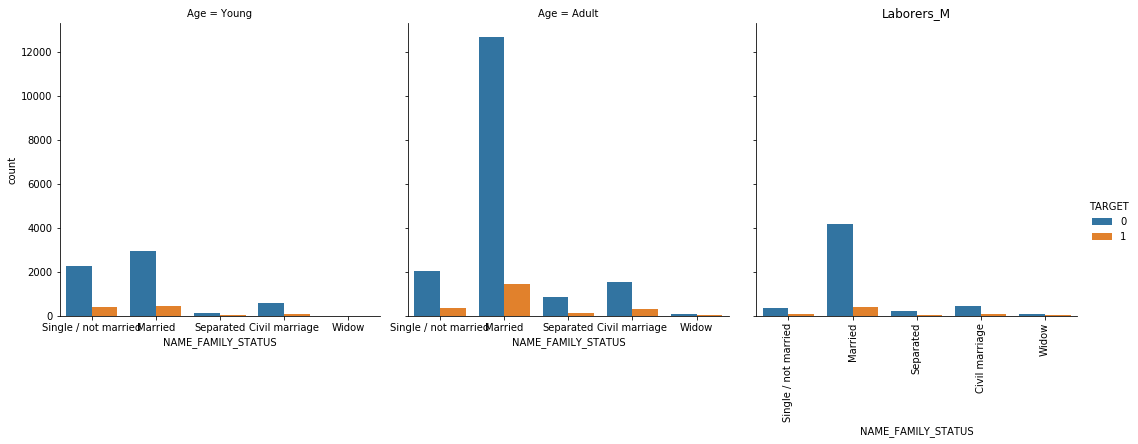

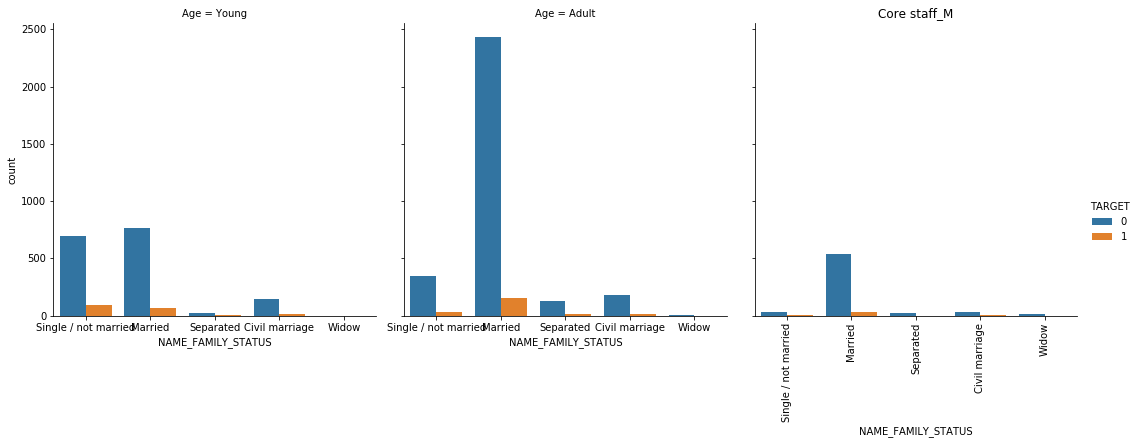

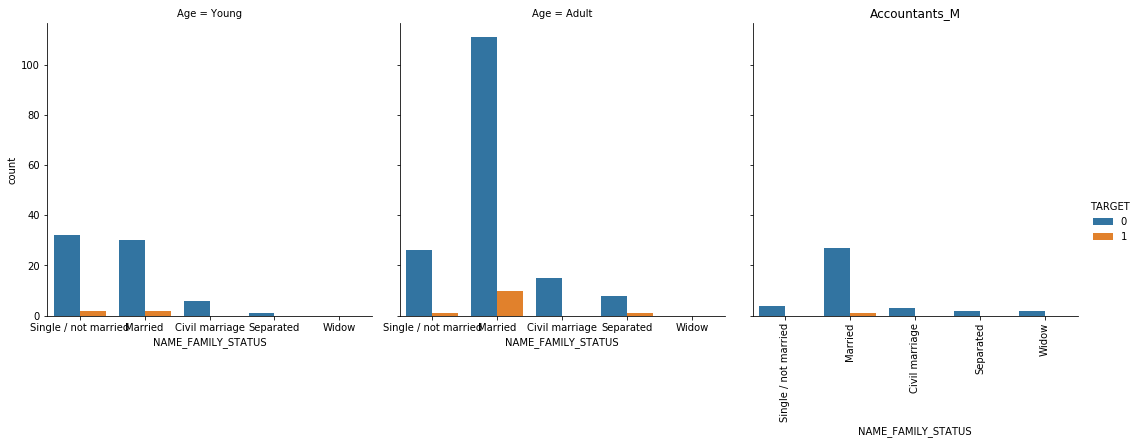

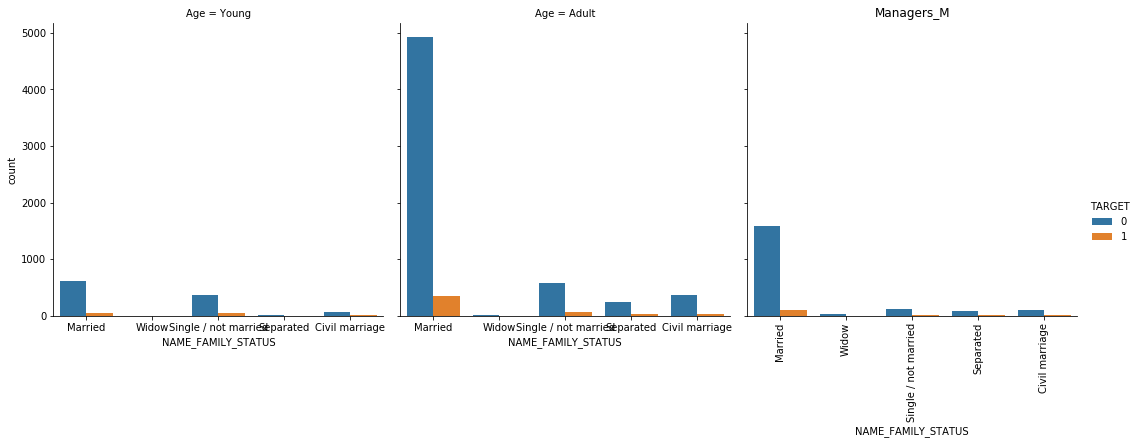

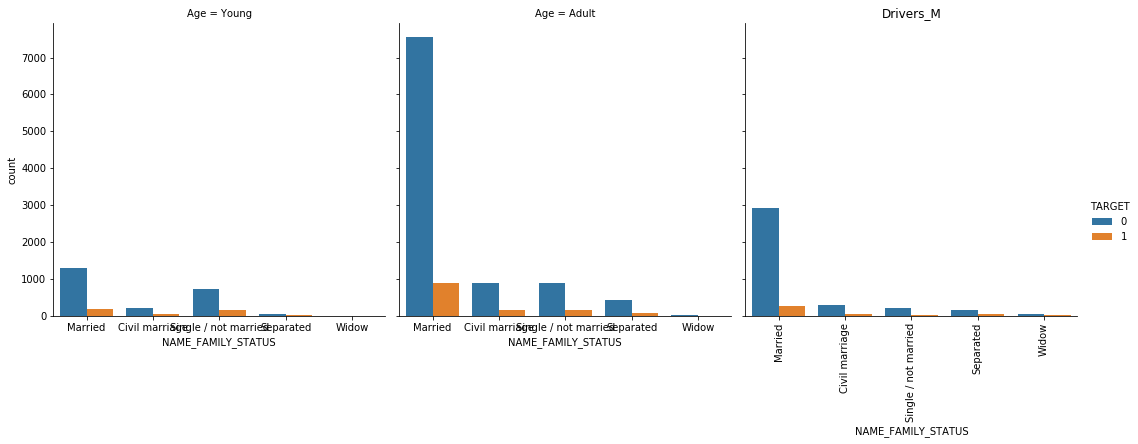

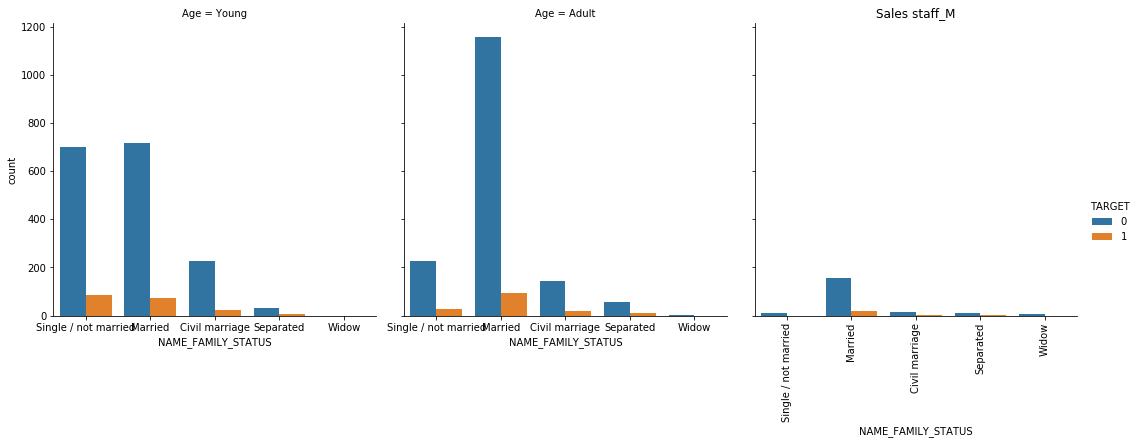

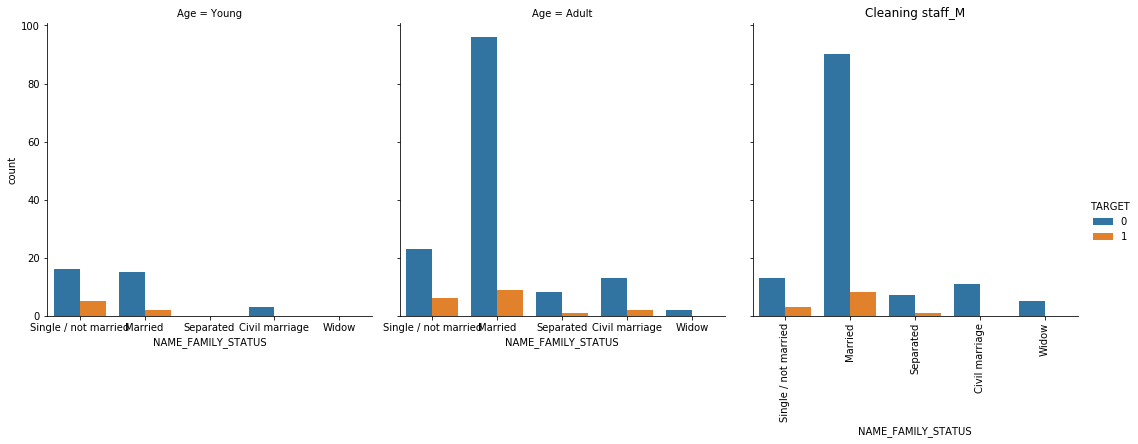

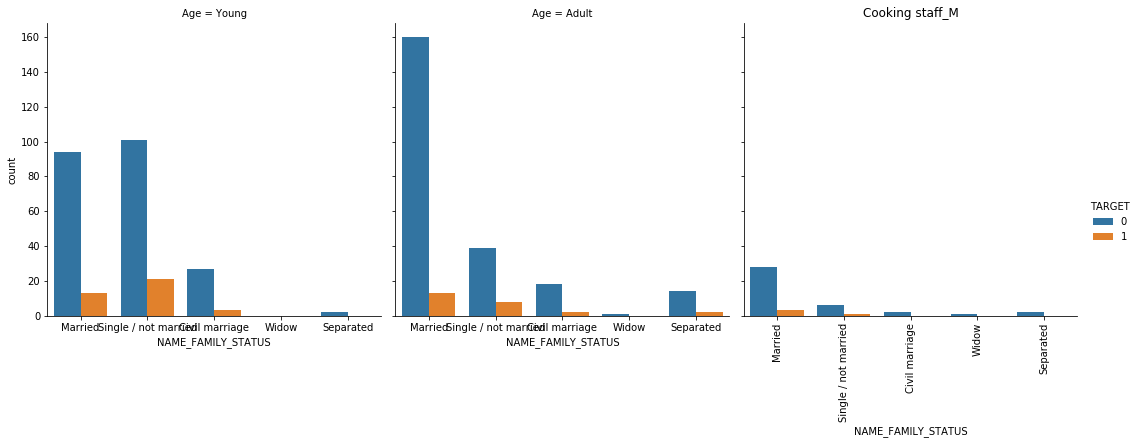

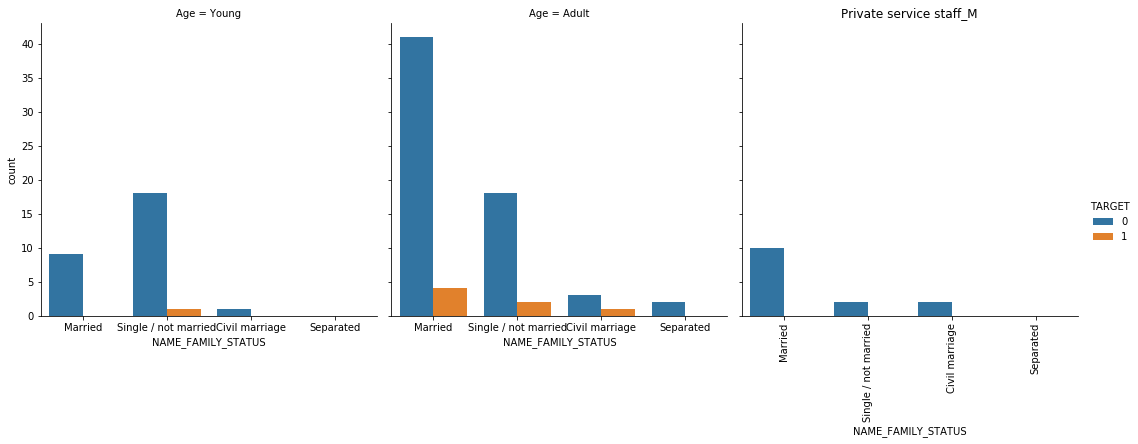

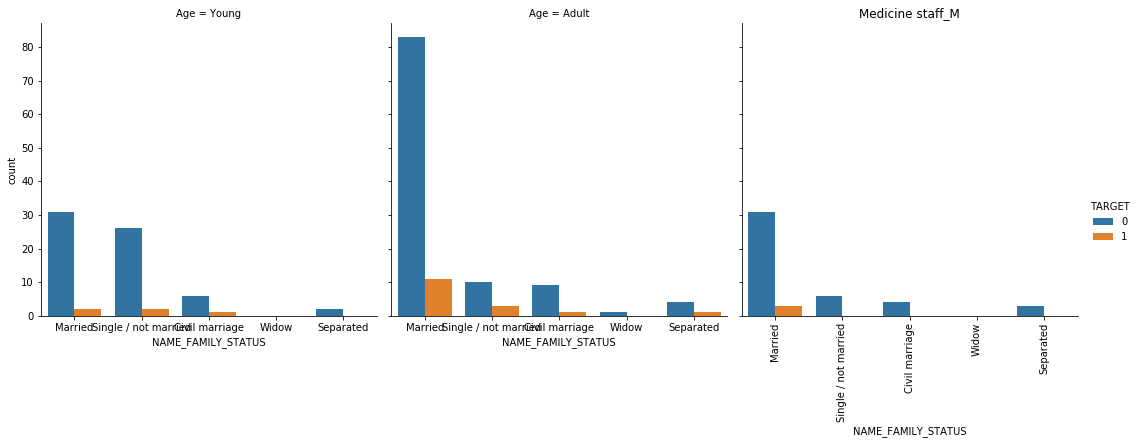

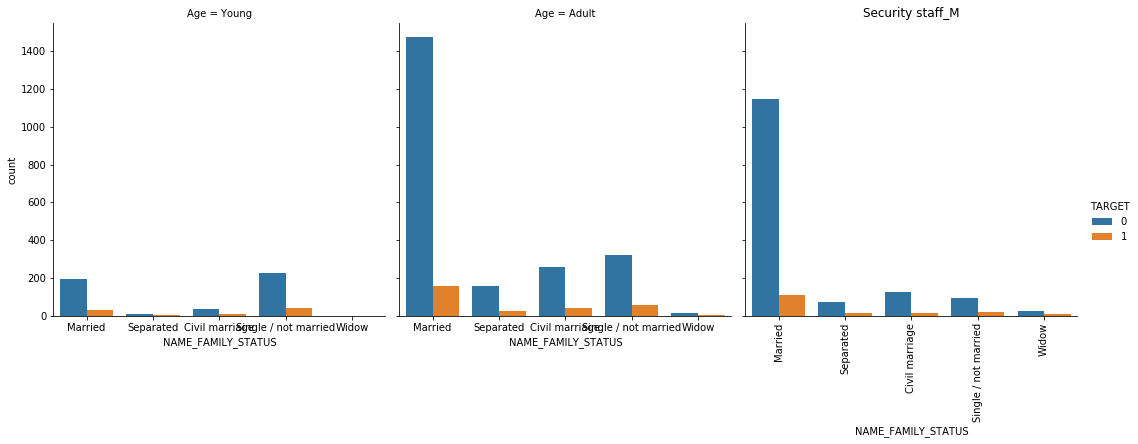

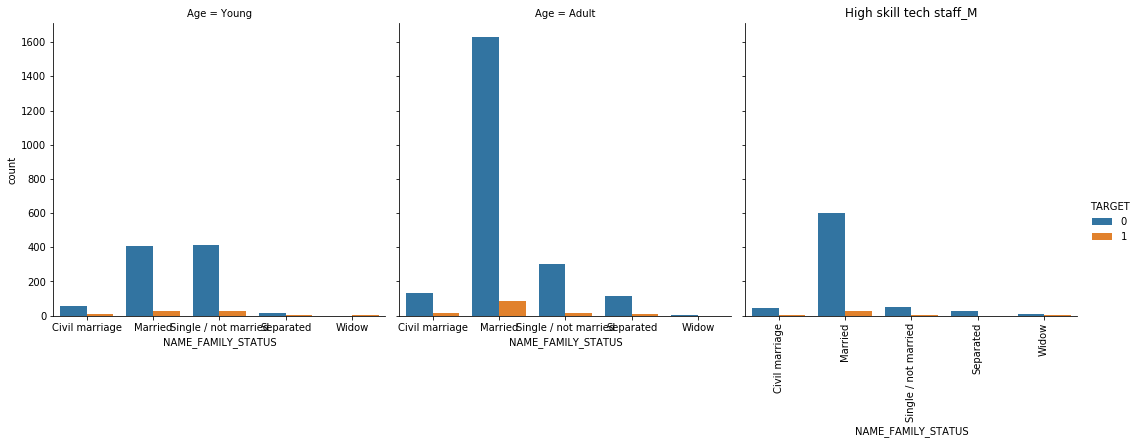

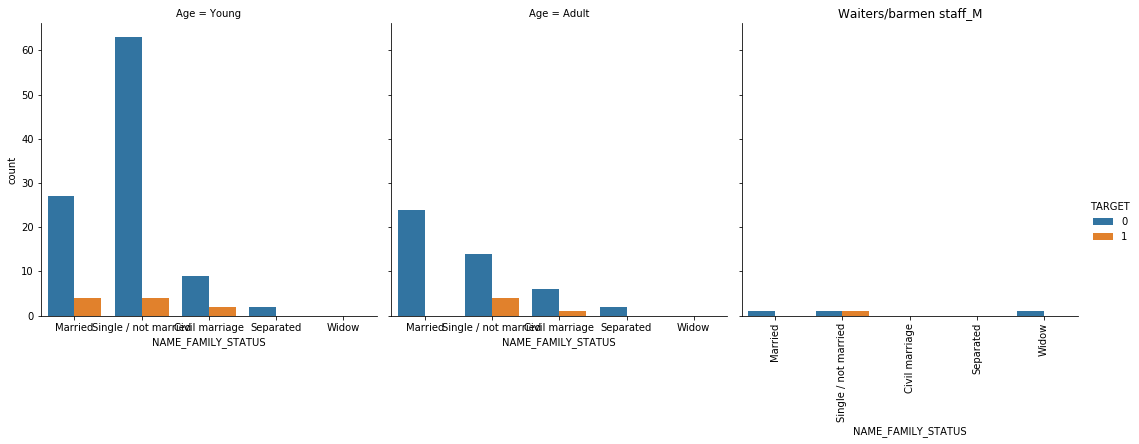

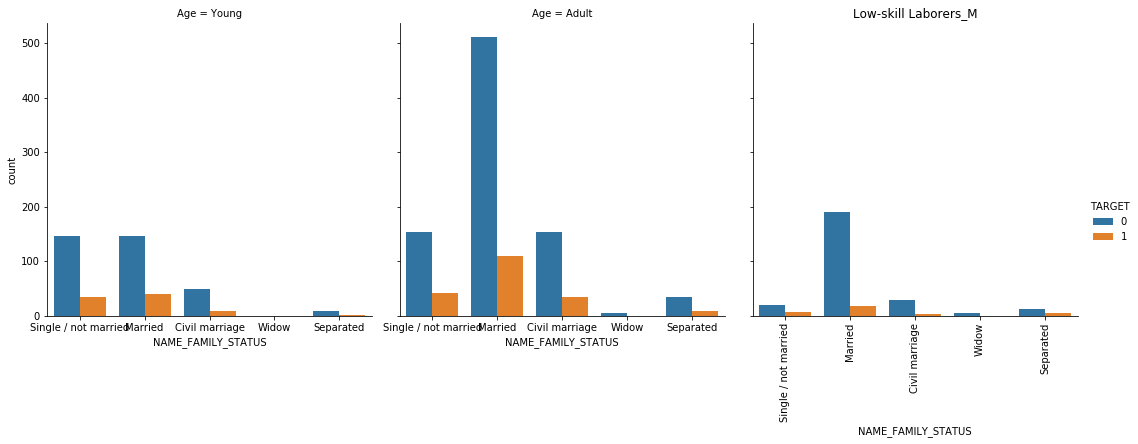

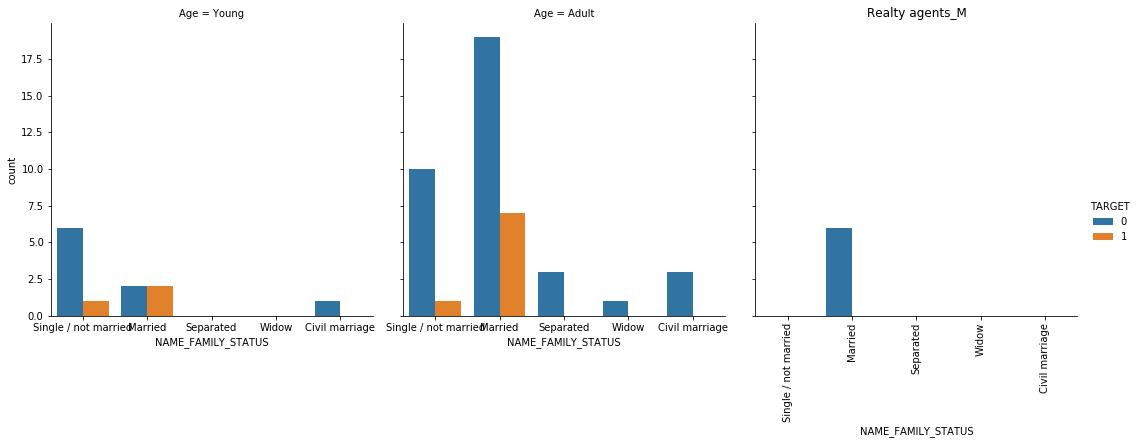

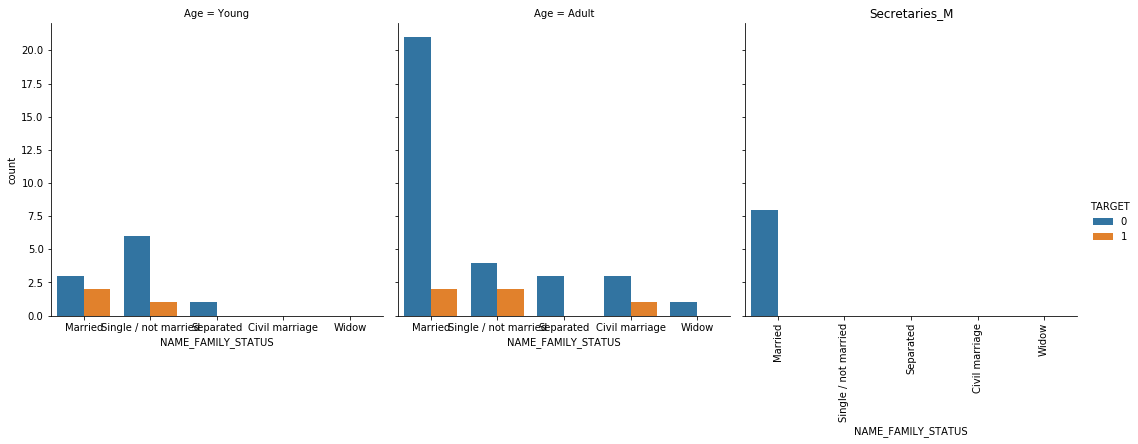

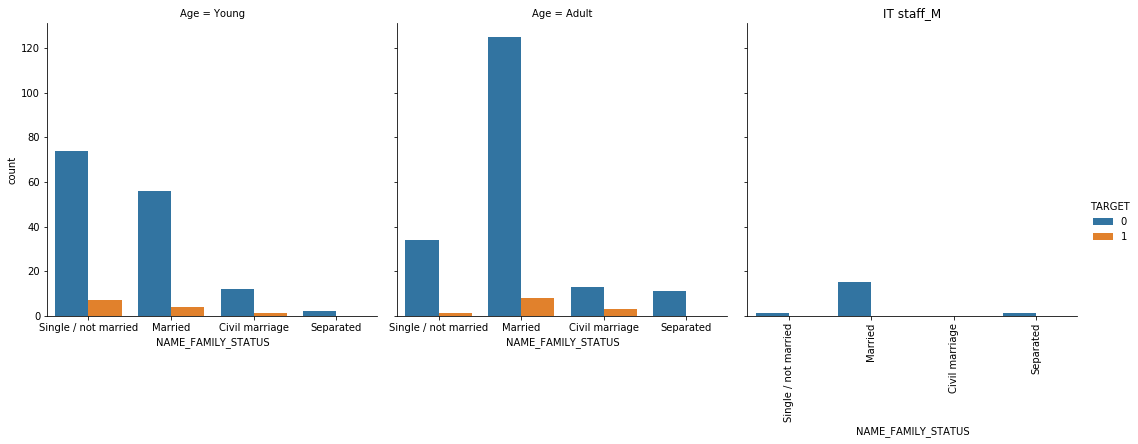

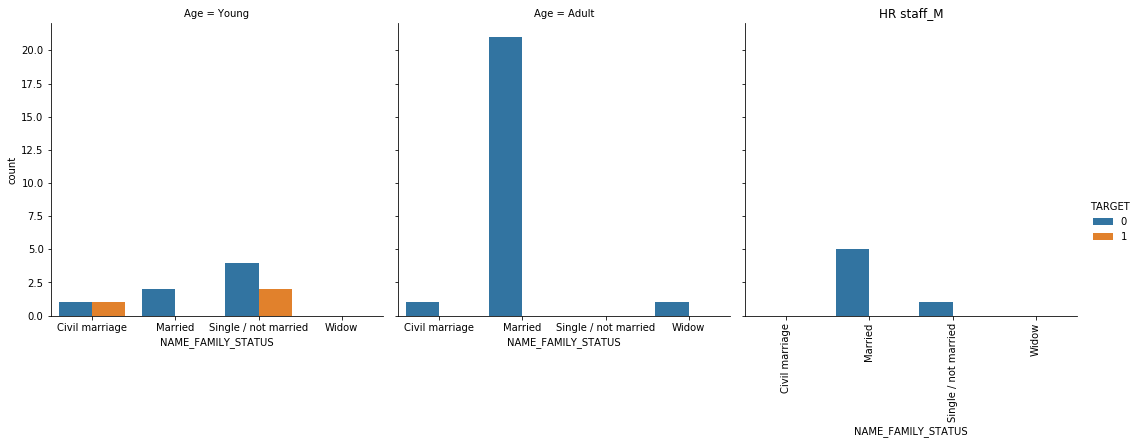

In [45]:
income_type=np.delete(df_application['OCCUPATION_TYPE'].unique(), 4)
genders=['M']
for i in income_type:
    for gender in genders:
        temp_dataframe = df_application[df_application['OCCUPATION_TYPE']==i][df_application['CODE_GENDER']==gender]
        if len(temp_dataframe) > 0:
            g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,orient='v' ,kind='count',data=temp_dataframe,aspect=1)
            plt.title(i + '_' + gender)
            plt.xticks(rotation= 90)
            plt.show()
    

### Observation:
-    Married males working for `Realty or as a Low skilled labours` has high probability of `having issue in returning the loan amount`
-    Males working as `HR professional` and in `age more than 30 has` more changes of `paying loan on time`

#### 5.4.2.2 for gender = Female 

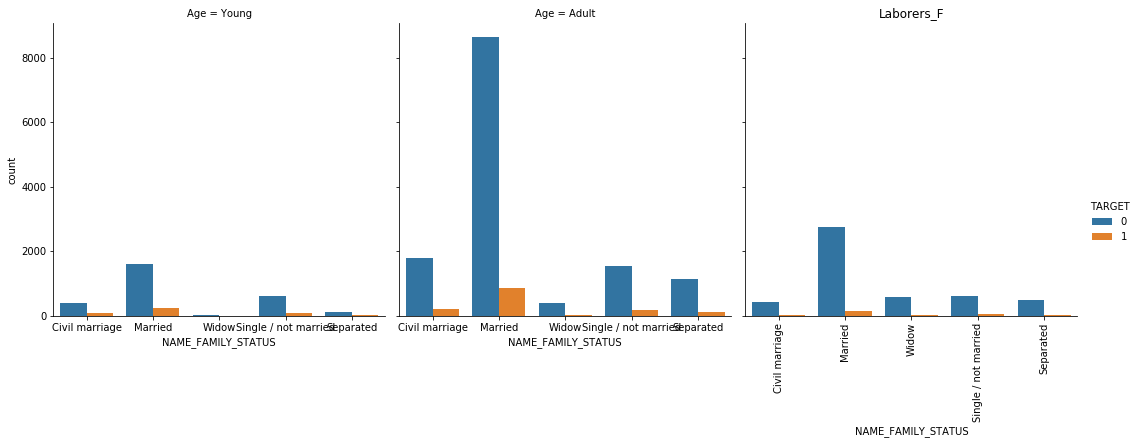

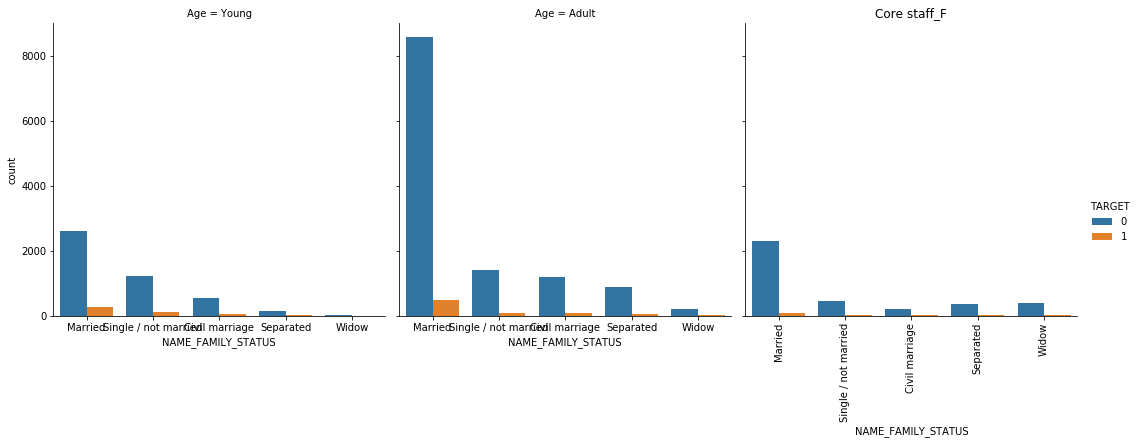

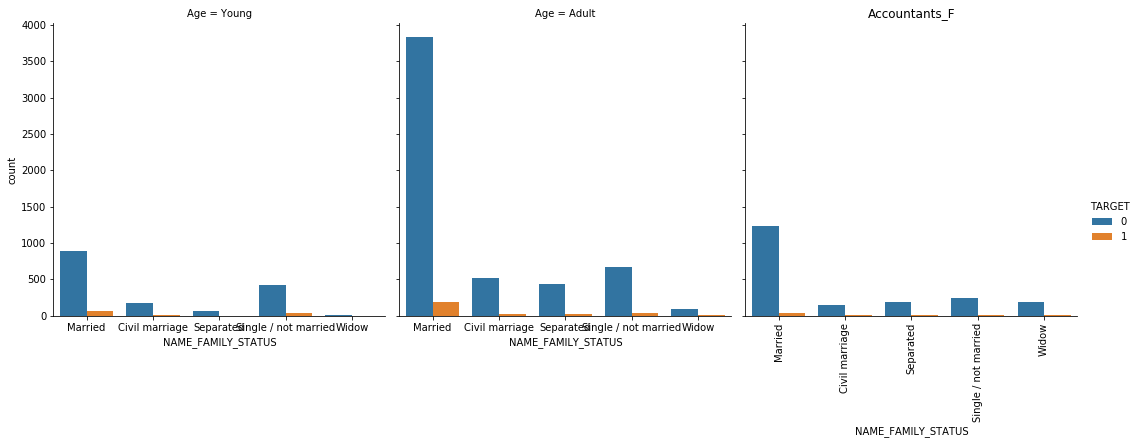

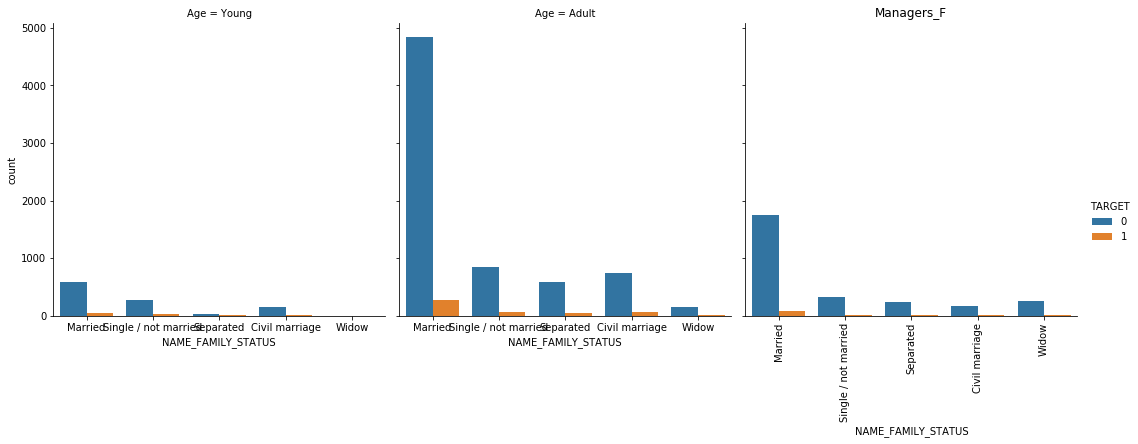

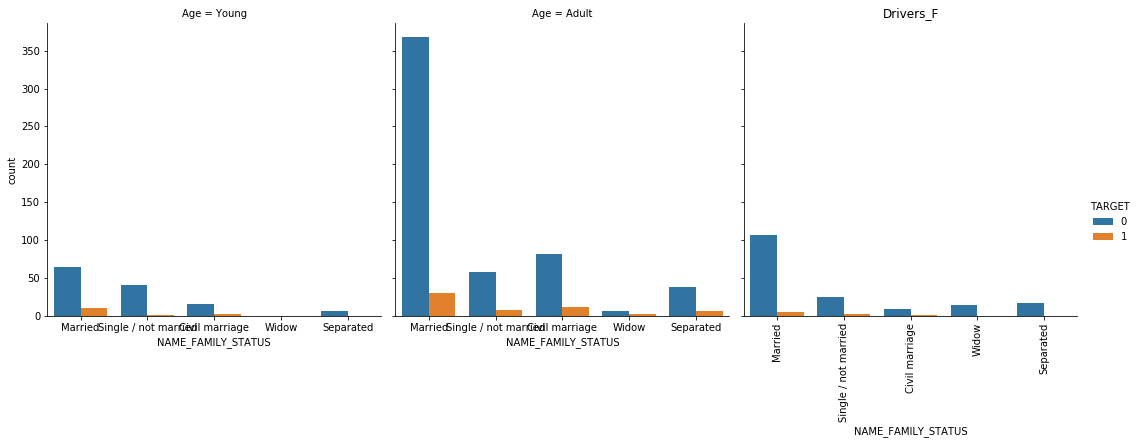

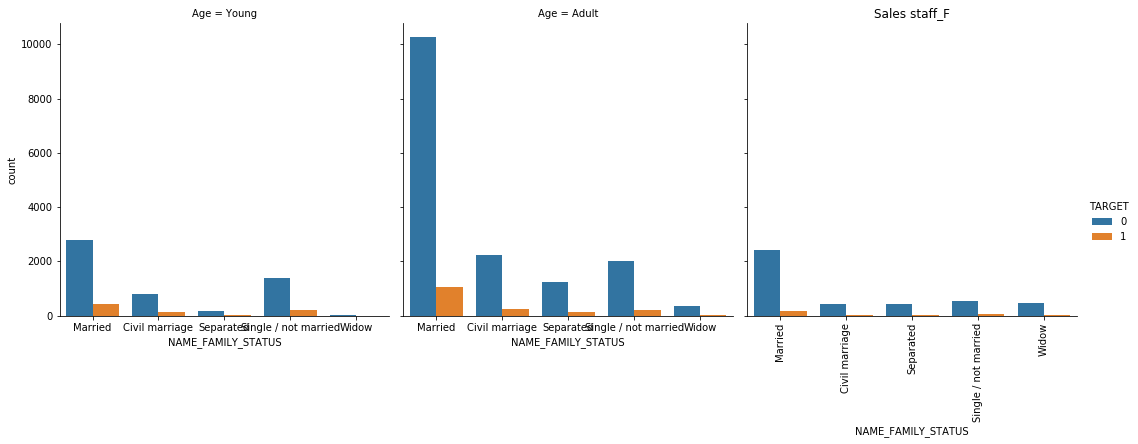

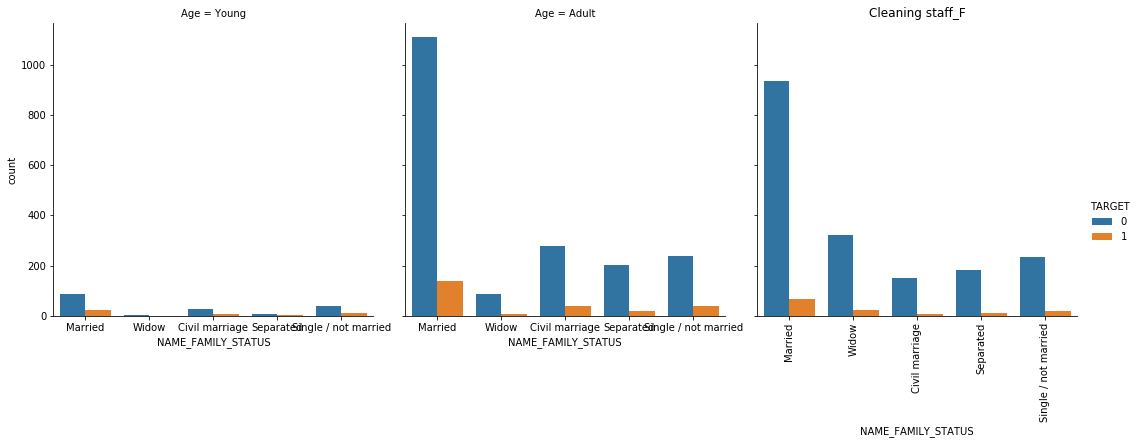

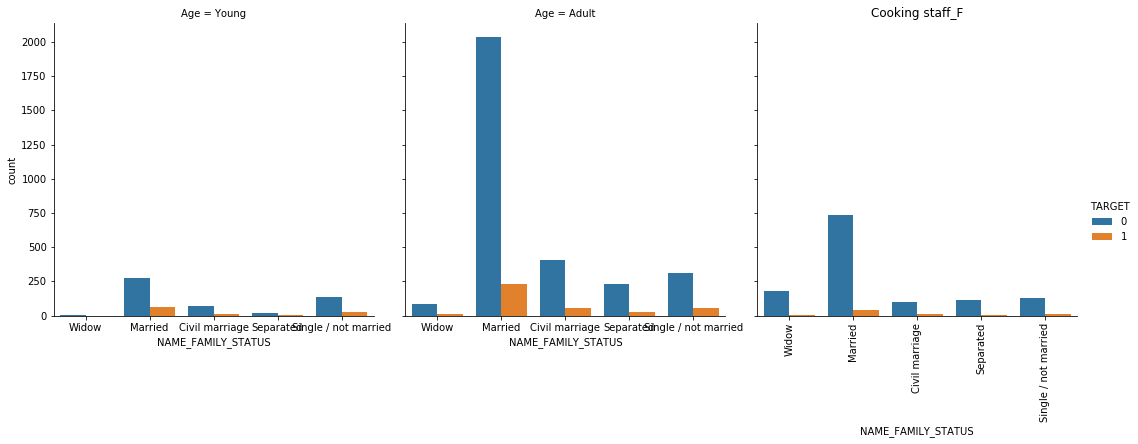

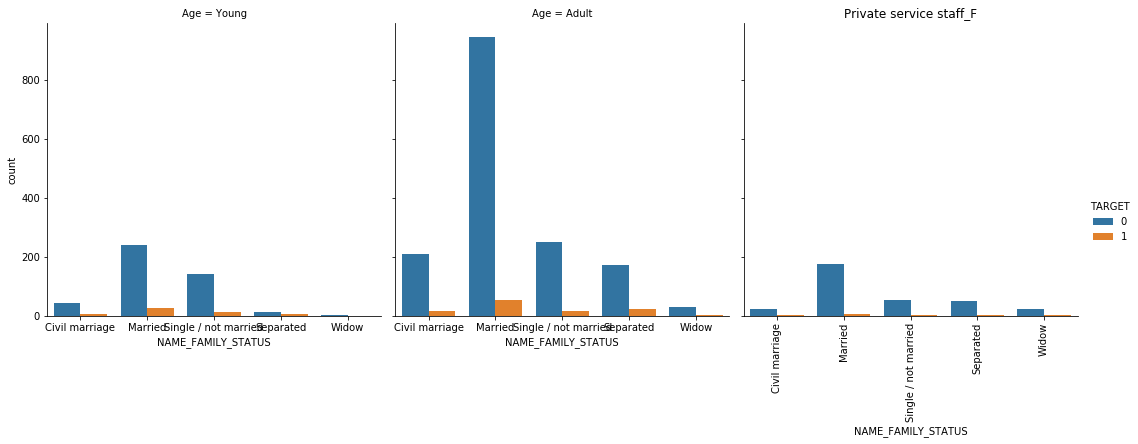

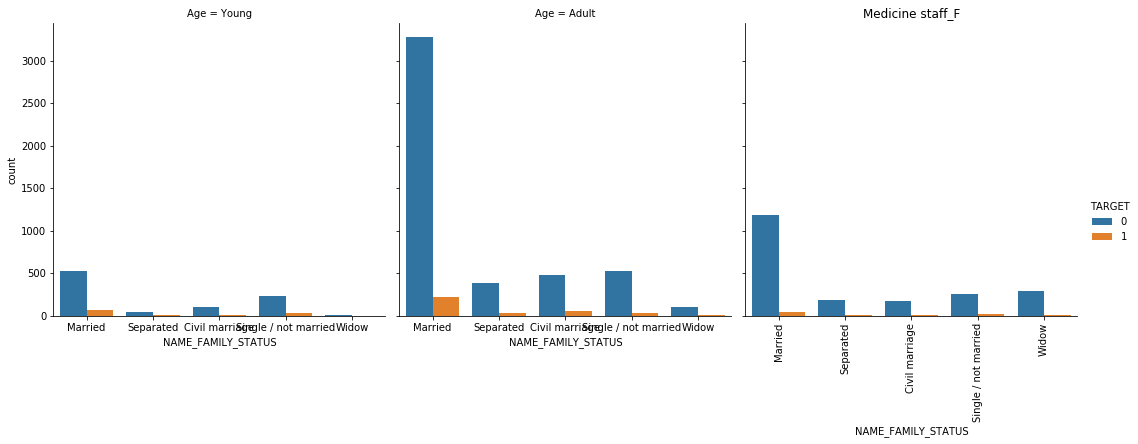

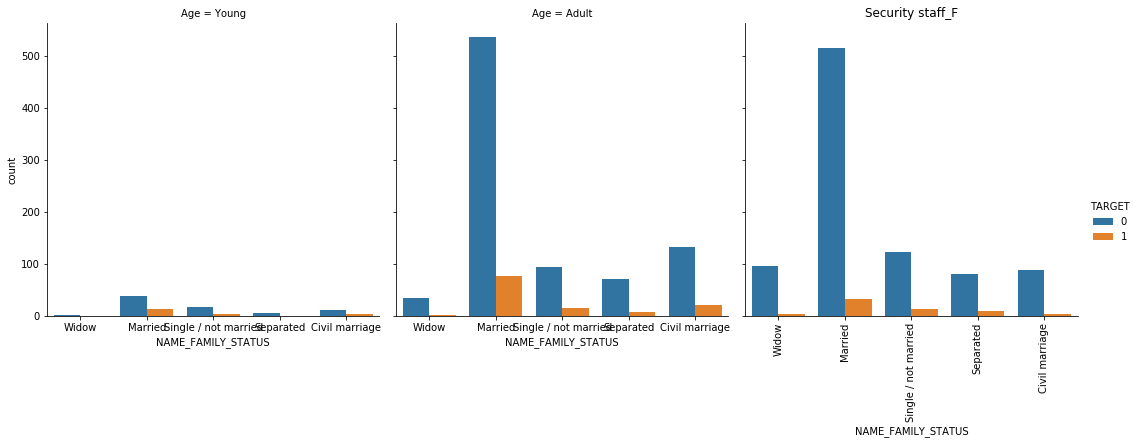

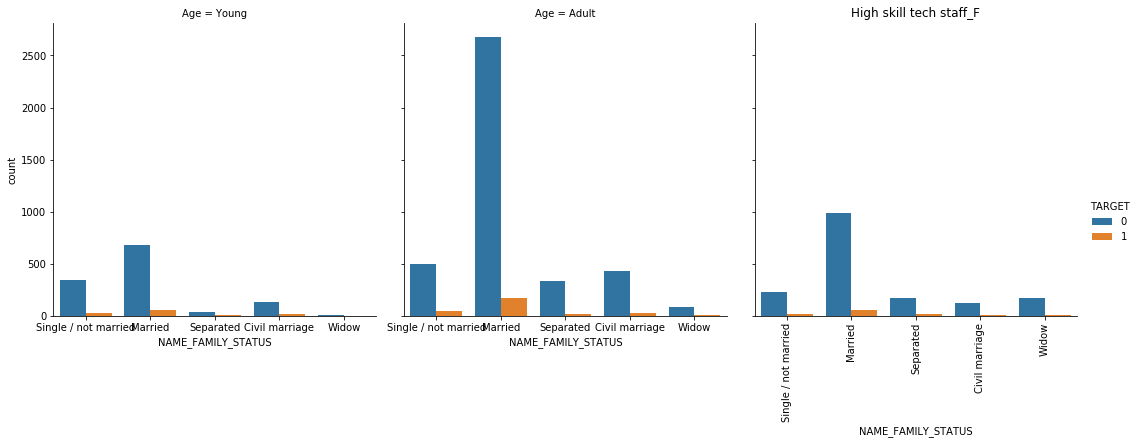

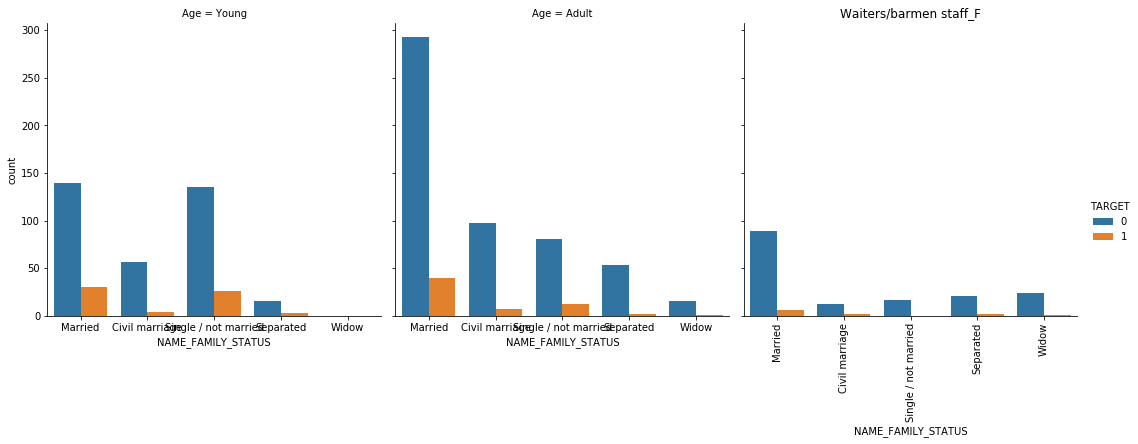

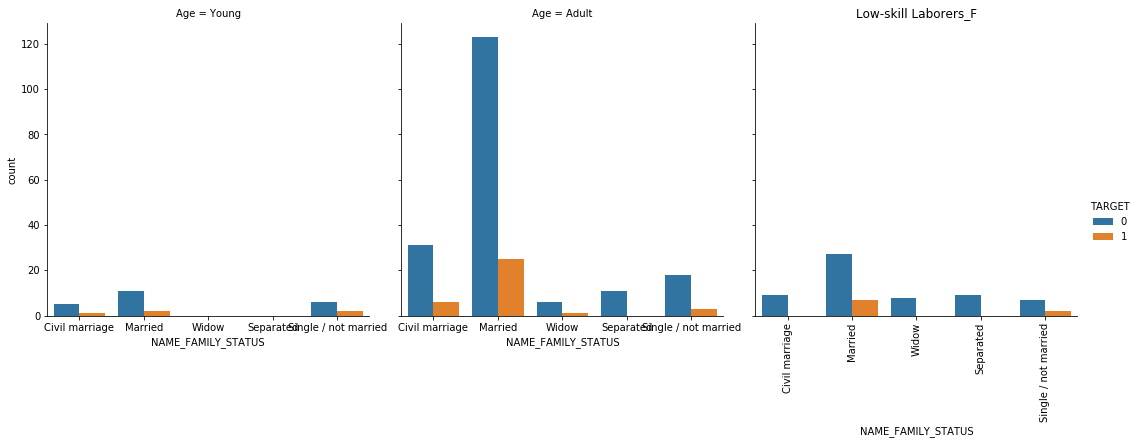

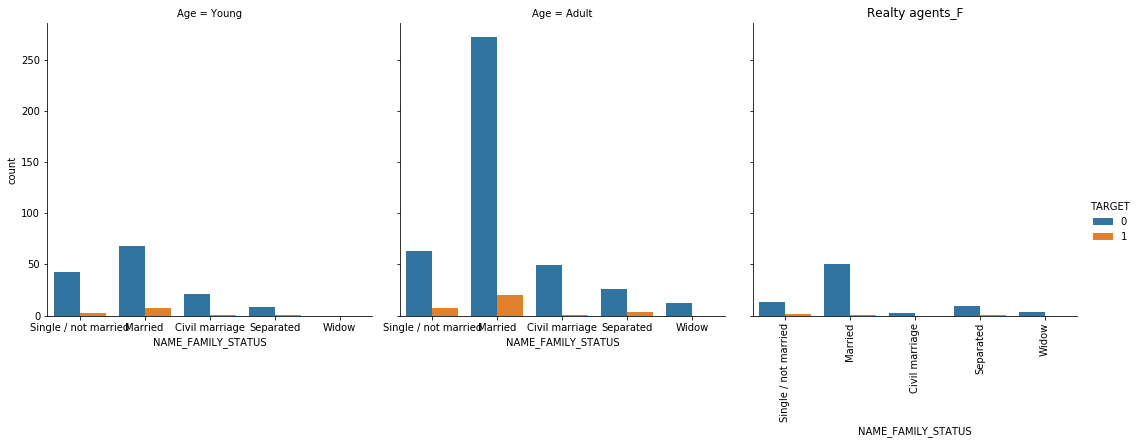

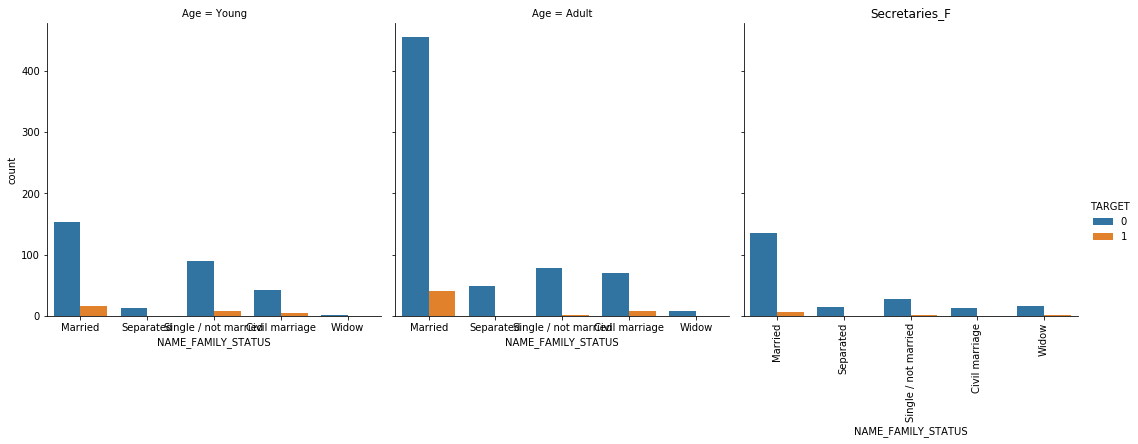

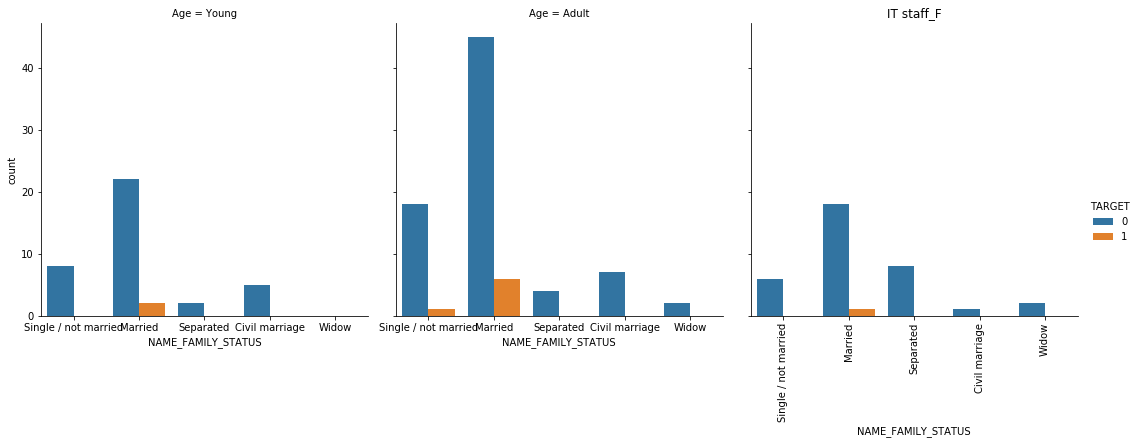

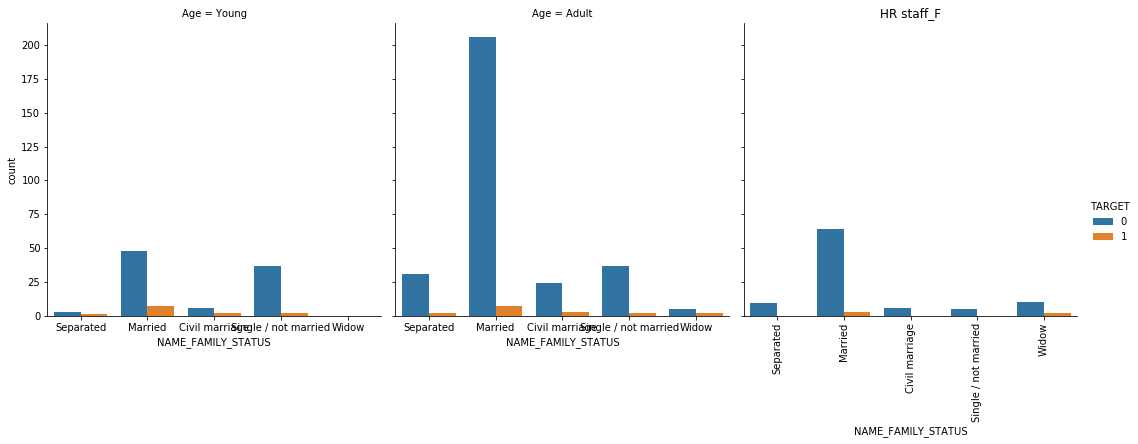

In [46]:
income_type=np.delete(df_application['OCCUPATION_TYPE'].unique(), 4)
genders=['F']
for i in income_type:
    for gender in genders:
        temp_dataframe = df_application[df_application['OCCUPATION_TYPE']==i][df_application['CODE_GENDER']==gender]
        if len(temp_dataframe) > 0:
            g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,orient='v' ,kind='count',data=temp_dataframe,aspect=1)
            plt.title(i + '_' + gender)
            plt.xticks(rotation=90)
            plt.show()
    

#### Observations:
- ###### Married Women in age of 30-50(Adult) and working as `Low skilled labour or Waiter or Security Staff` is high changes of `Risk or having issues with payment on time`

#### 5.4.2.3 for gender = XNA 

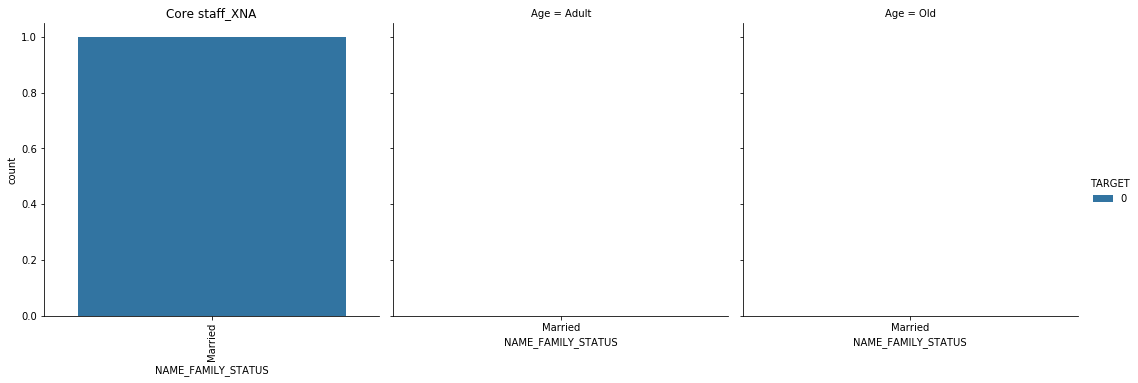

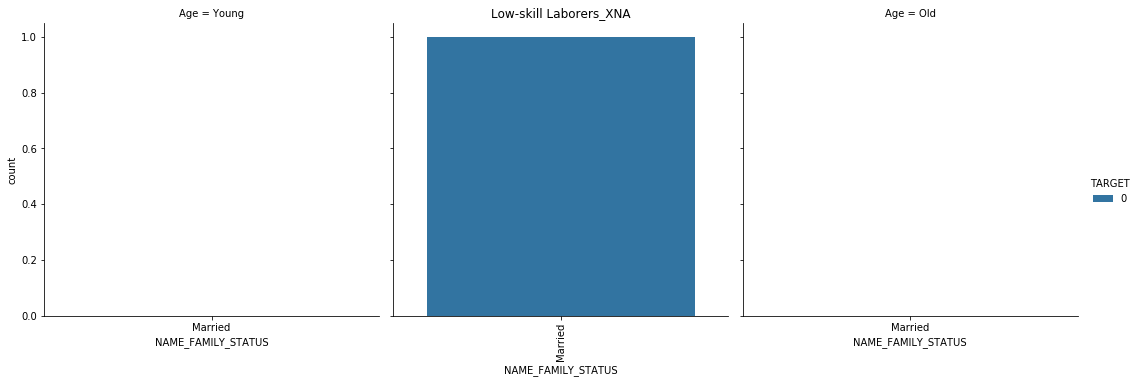

In [47]:
income_type=np.delete(df_application['OCCUPATION_TYPE'].unique(), 4)
genders=['XNA']
for i in income_type:
    for gender in genders:
        temp_dataframe = df_application[df_application['OCCUPATION_TYPE']==i][df_application['CODE_GENDER']==gender]
        if len(temp_dataframe) > 0:
            g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,orient='v' ,kind='count',data=temp_dataframe,aspect=1)
            plt.title(i + '_' + gender)
            plt.xticks(rotation=90)
            plt.show()

### Observation:
- ###### People who havent defined their gender are more likly to pay their loan on time

### 5.4.2.4 analysis based in Income_lable

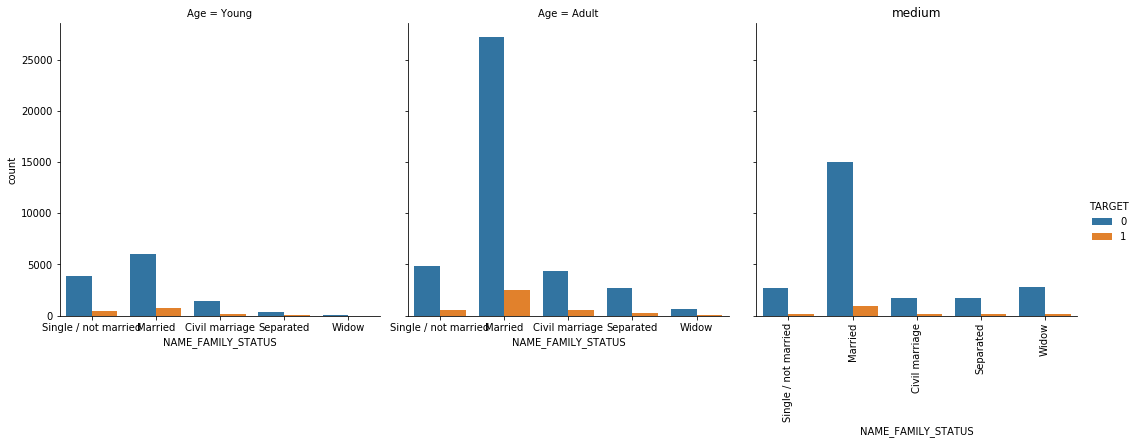

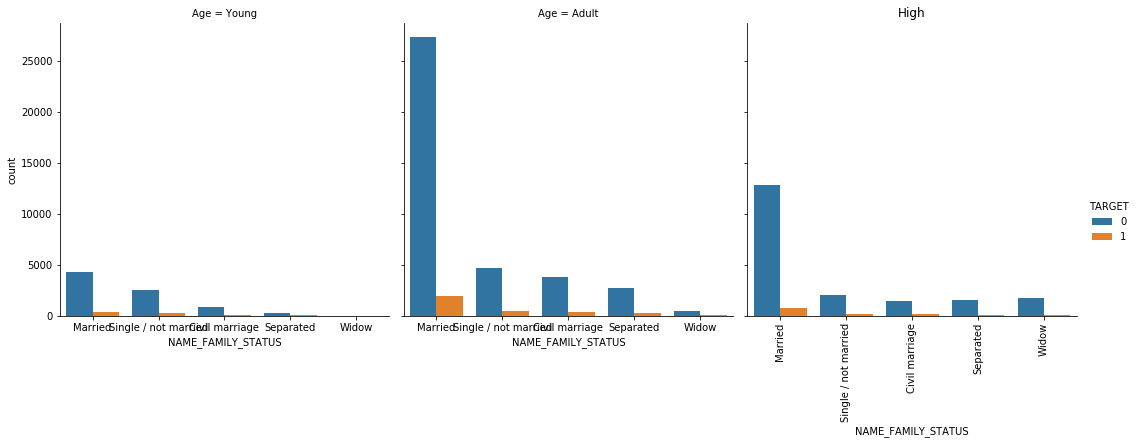

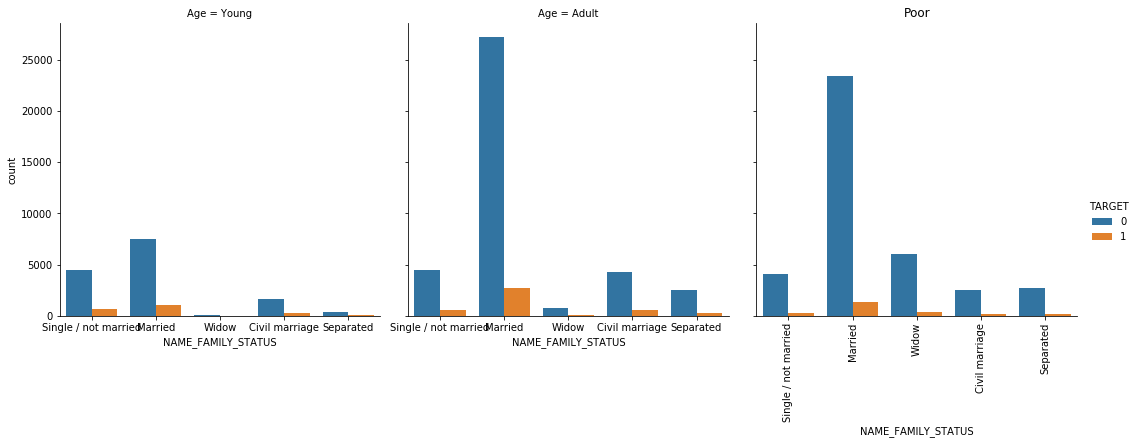

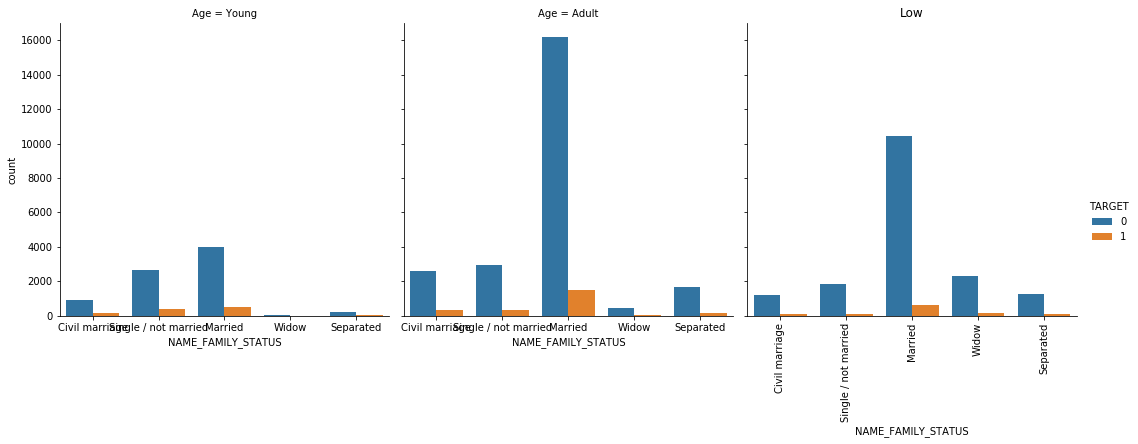

In [48]:
income_label=df_application.Income_lable.astype('str').unique()
for i in income_label:
    g = sns.catplot(x='NAME_FAMILY_STATUS', hue='TARGET', col= 'Age',col_wrap=3,orient='v' ,kind='count',data=df_application[df_application.Income_lable==i],aspect=1)
    plt.title(i )
    plt.xticks(rotation=90)
    plt.show()

### 5.4.2.5 below multivarient  analysis is based on following column 
-    'Age Group'
-    'Gender'
-    'REGION_RATING_CLIENT'
-    'Family Status'

We will try to figure out which customer has issue in payment based on the above values

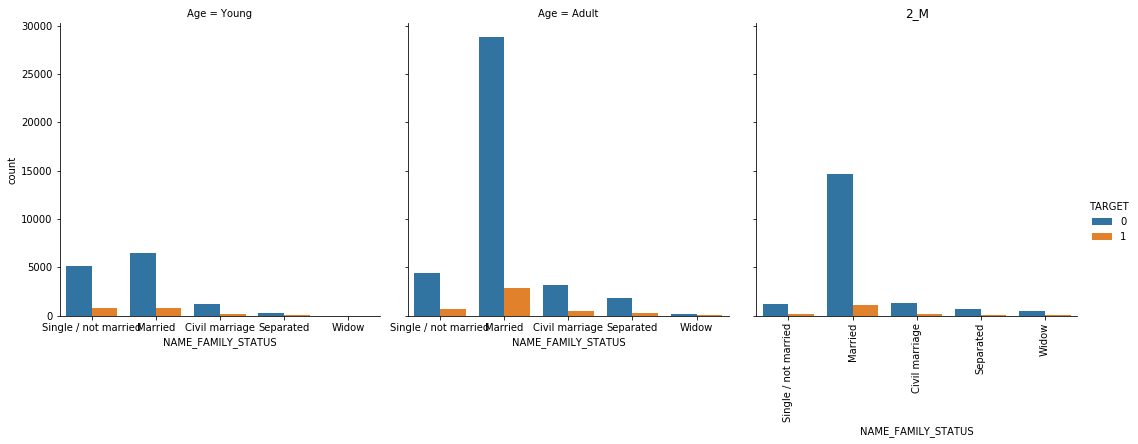

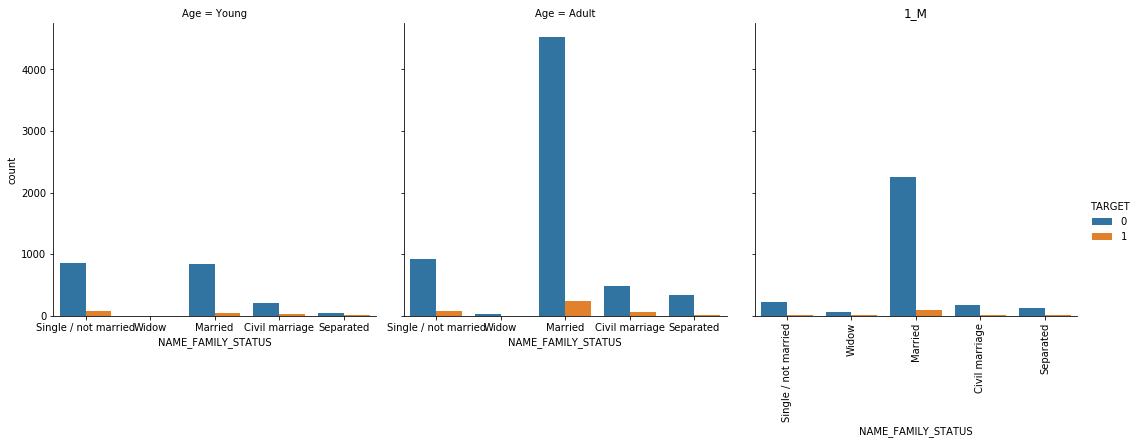

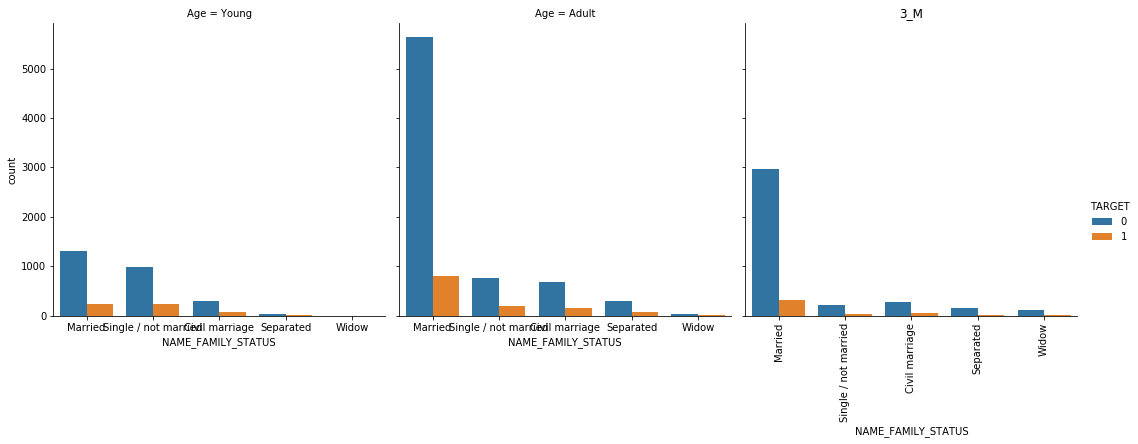

In [49]:
# Analysis for Male customers
REGION_RATING_CLIENT=df_application['REGION_RATING_CLIENT'].unique()
REGION_RATING_CLIENT
genders=['M']
for i in REGION_RATING_CLIENT:
    for gender in genders:
        temp_dataframe = df_application[df_application['REGION_RATING_CLIENT']==i][df_application['CODE_GENDER']==gender]
        if len(temp_dataframe) > 0:
            g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,kind='count',data=temp_dataframe,aspect=1)
            plt.title(str(i) + '_' + gender)
            plt.xticks(rotation=90)
            plt.show()

### Observations

-   `Male customer of age 30-50 (Adult) from Region id 1 are more likly to pay EMI on time`
-   `Married male customer of age 30-50 (Adult) from Region 2 and 3 are more likly to be defaulter and should be given loan on higher rate of intereat`

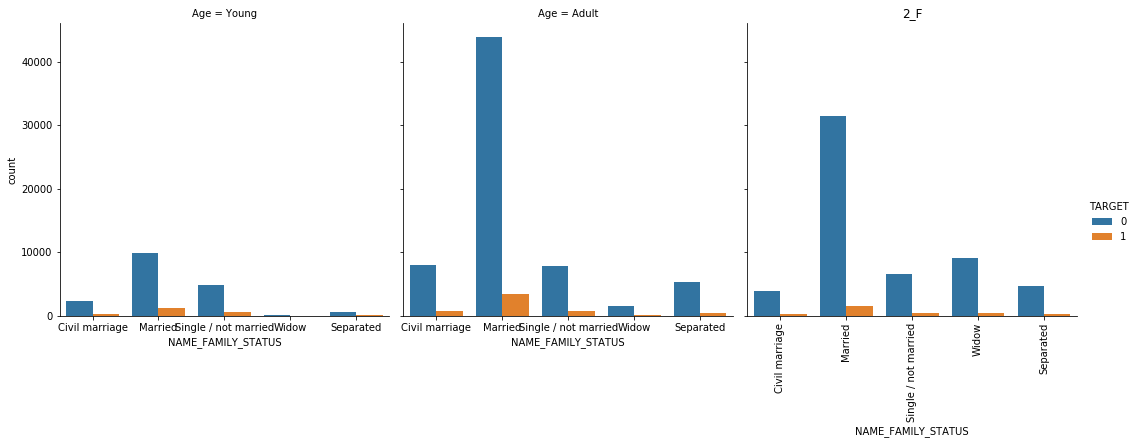

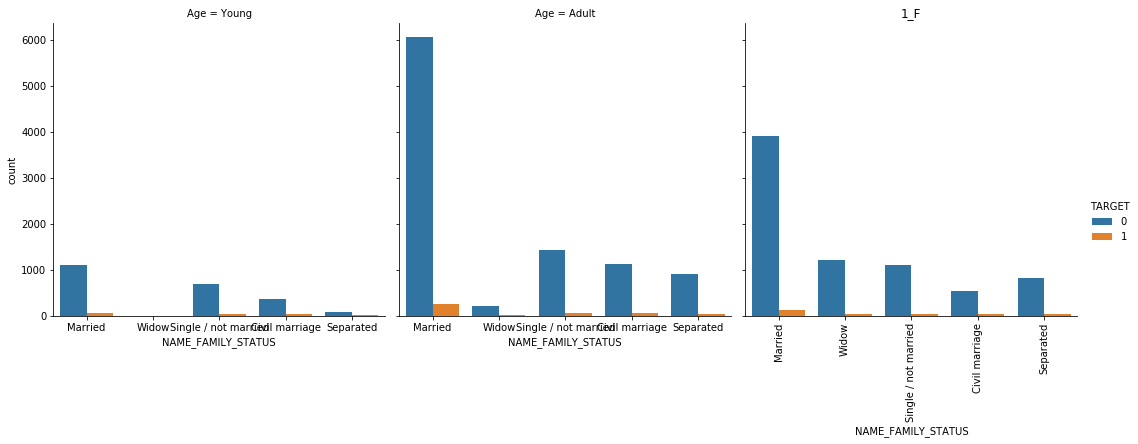

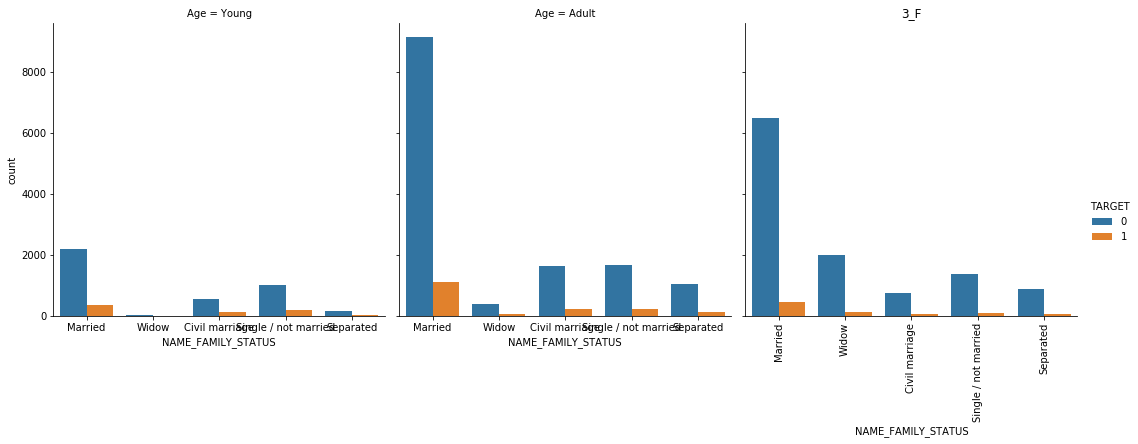

In [50]:
# Analysis for Female customers

REGION_RATING_CLIENT=df_application['REGION_RATING_CLIENT'].unique()
REGION_RATING_CLIENT
# df_application[df_application['REGION_RATING_CLIENT']==3] REGION_RATING_CLIENT_W_CITY
genders=['F']
for i in REGION_RATING_CLIENT:
    for gender in genders:
        temp_dataframe = df_application[df_application['REGION_RATING_CLIENT']==i][df_application['CODE_GENDER']==gender]
        if len(temp_dataframe) > 0:
            g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,kind='count',data=temp_dataframe,aspect=1)
            plt.title(str(i) + '_' + gender)
            plt.xticks(rotation=90)
            plt.show()

### Observations

-   `Female customer of age 30-50 (Adult) from Region id 1 are more likly to pay EMI on time`
-   `Married Female customer of age 30-50 (Adult) from Region 2 and 3 are more likly to be defaulter and should be given loan on higher rate of intereat`

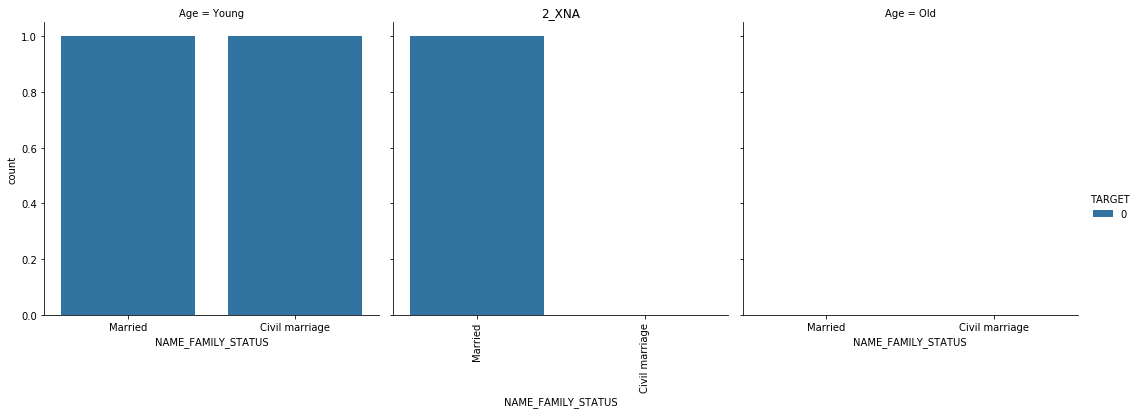

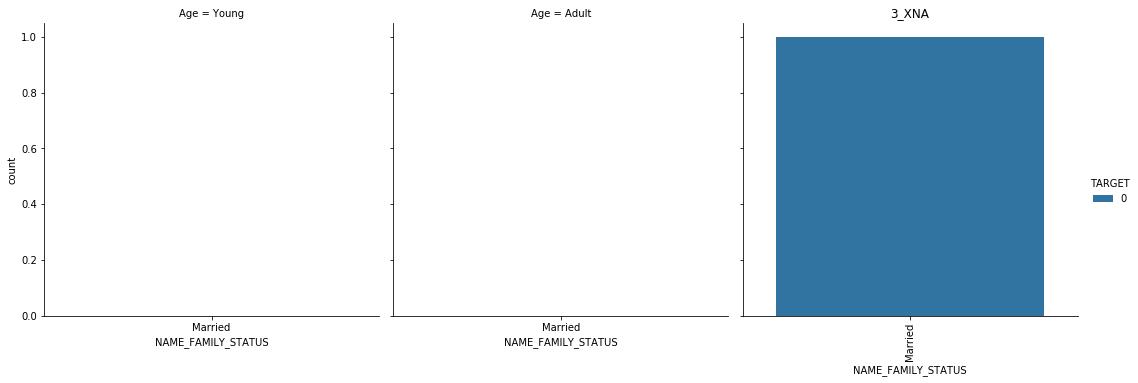

In [51]:
# Analysis for XNA customers

REGION_RATING_CLIENT=df_application['REGION_RATING_CLIENT'].unique()
REGION_RATING_CLIENT
genders=['XNA']
for i in REGION_RATING_CLIENT:
    for gender in genders:
        temp_dataframe = df_application[df_application['REGION_RATING_CLIENT']==i][df_application['CODE_GENDER']==gender]
        if len(temp_dataframe) > 0:
            g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,kind='count',data=temp_dataframe,aspect=1)
            plt.title(str(i) + '_' + gender)
            plt.xticks(rotation=90)
            plt.show()

### Observations

-   `Customer who havent defined gender are more likly to pay loan on time`


### 5.4.2.6 REGION_RATING_CLIENT_W_CITY Vs REGION_RATING_CLIENT vs Age

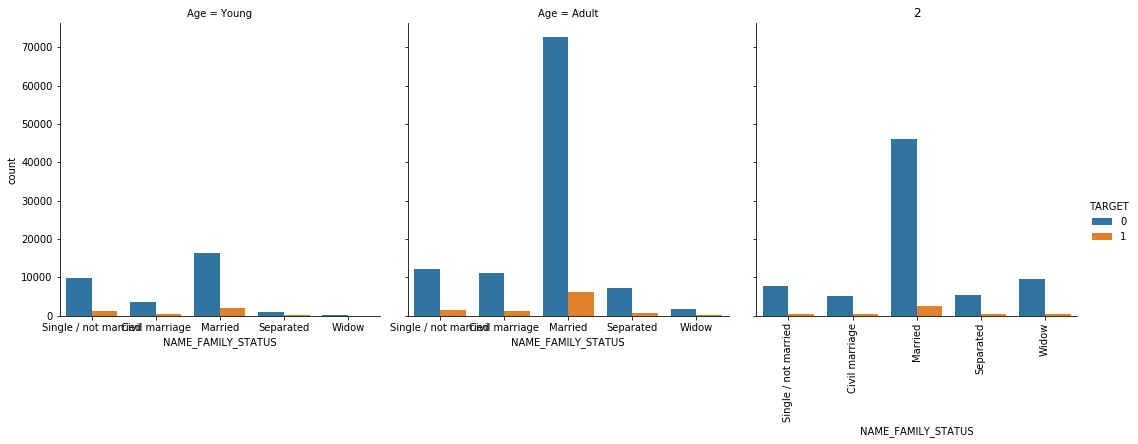

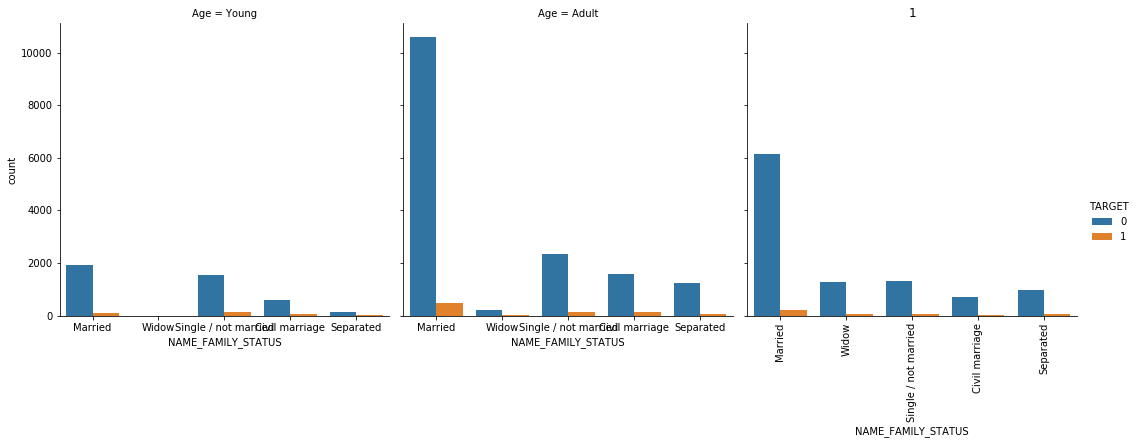

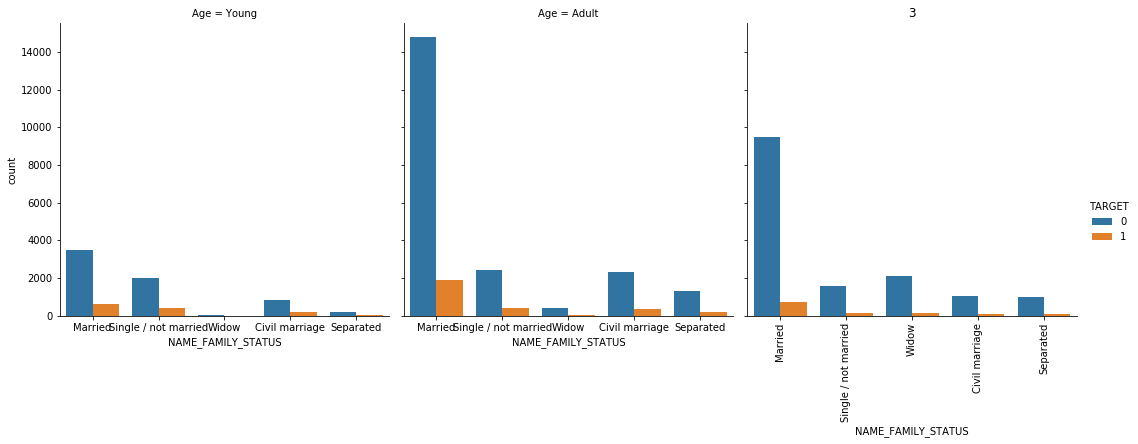

In [52]:
# df_application

REGION_RATING_CLIENT_W_CITY=df_application['REGION_RATING_CLIENT_W_CITY'].unique()
REGION_RATING_CLIENT_W_CITY

for i in REGION_RATING_CLIENT_W_CITY:
    temp_dataframe = df_application[df_application['REGION_RATING_CLIENT']==i]
    if len(temp_dataframe) > 0:
        g = sns.catplot(x='NAME_FAMILY_STATUS',margin_titles=True , hue='TARGET', col= 'Age',col_wrap=3,kind='count',data=temp_dataframe,aspect=1)
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

###### Observation
- ###### Applicants from region 1 are less likely to have issues while paying Loan

### 5.5 Corelation

###### 5.5.1 For deaulters(TARGET=1)

In [53]:
var_numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_1 = (df_1.select_dtypes(include=var_numerics)).corr().abs()
corr_1 = pd.DataFrame(corr_1.unstack()).reset_index()
corr_1.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
dup = (corr_1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (corr_1['FEATURE_1']==corr_1['FEATURE_2']) 
corr_1 = corr_1[~dup]
print(corr_1.nlargest(10,['CORRELATION']))

                      FEATURE_1                    FEATURE_2  CORRELATION
220               DAYS_EMPLOYED               FLAG_EMP_PHONE     0.999705
98                   AMT_CREDIT              AMT_GOODS_PRICE     0.982783
457        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.956637
64                 CNT_CHILDREN              CNT_FAM_MEMBERS     0.885484
121                 AMT_ANNUITY              AMT_GOODS_PRICE     0.752295
97                   AMT_CREDIT                  AMT_ANNUITY     0.752195
193                  DAYS_BIRTH                DAYS_EMPLOYED     0.581849
197                  DAYS_BIRTH               FLAG_EMP_PHONE     0.578184
181  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY     0.446977
180  REGION_POPULATION_RELATIVE         REGION_RATING_CLIENT     0.443236


###### 5.5.2 For Non deaulters (TARGET =0)

In [54]:
var_numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_1 = (df_0.select_dtypes(include=var_numerics)).corr().abs()
corr_1 = pd.DataFrame(corr_1.unstack()).reset_index()
corr_1.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
dup = (corr_1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (corr_1['FEATURE_1']==corr_1['FEATURE_2']) 
corr_1 = corr_1[~dup]
print(corr_1.nlargest(10,['CORRELATION']))

                      FEATURE_1                    FEATURE_2  CORRELATION
220               DAYS_EMPLOYED               FLAG_EMP_PHONE     0.999756
98                   AMT_CREDIT              AMT_GOODS_PRICE     0.987022
457        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.950149
64                 CNT_CHILDREN              CNT_FAM_MEMBERS     0.878572
121                 AMT_ANNUITY              AMT_GOODS_PRICE     0.776423
97                   AMT_CREDIT                  AMT_ANNUITY     0.771298
193                  DAYS_BIRTH                DAYS_EMPLOYED     0.625928
197                  DAYS_BIRTH               FLAG_EMP_PHONE     0.621888
180  REGION_POPULATION_RELATIVE         REGION_RATING_CLIENT     0.539006
181  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY     0.537302


###### Observation:
-   ##### Corelation between DAYS_EMPLOYED & FLAG_EMP_PHONE,AMT_CREDIT & AMT_GOODS_PRICE, REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY, CNT_CHILDREN & CNT_FAM_MEMBERS, AMT_ANNUITY & AMT_GOODS_PRICE and AMT_CREDIT &AMT_ANNUITY are around same with respect to TARGET
-   ##### Corelation other than above variables having difference with respect to TARGET


###### 5.5.3 Visual INSIGHT for top 10 corelation in terms of non Defaulter

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ]),
 <a list of 7 Text xticklabel objects>)

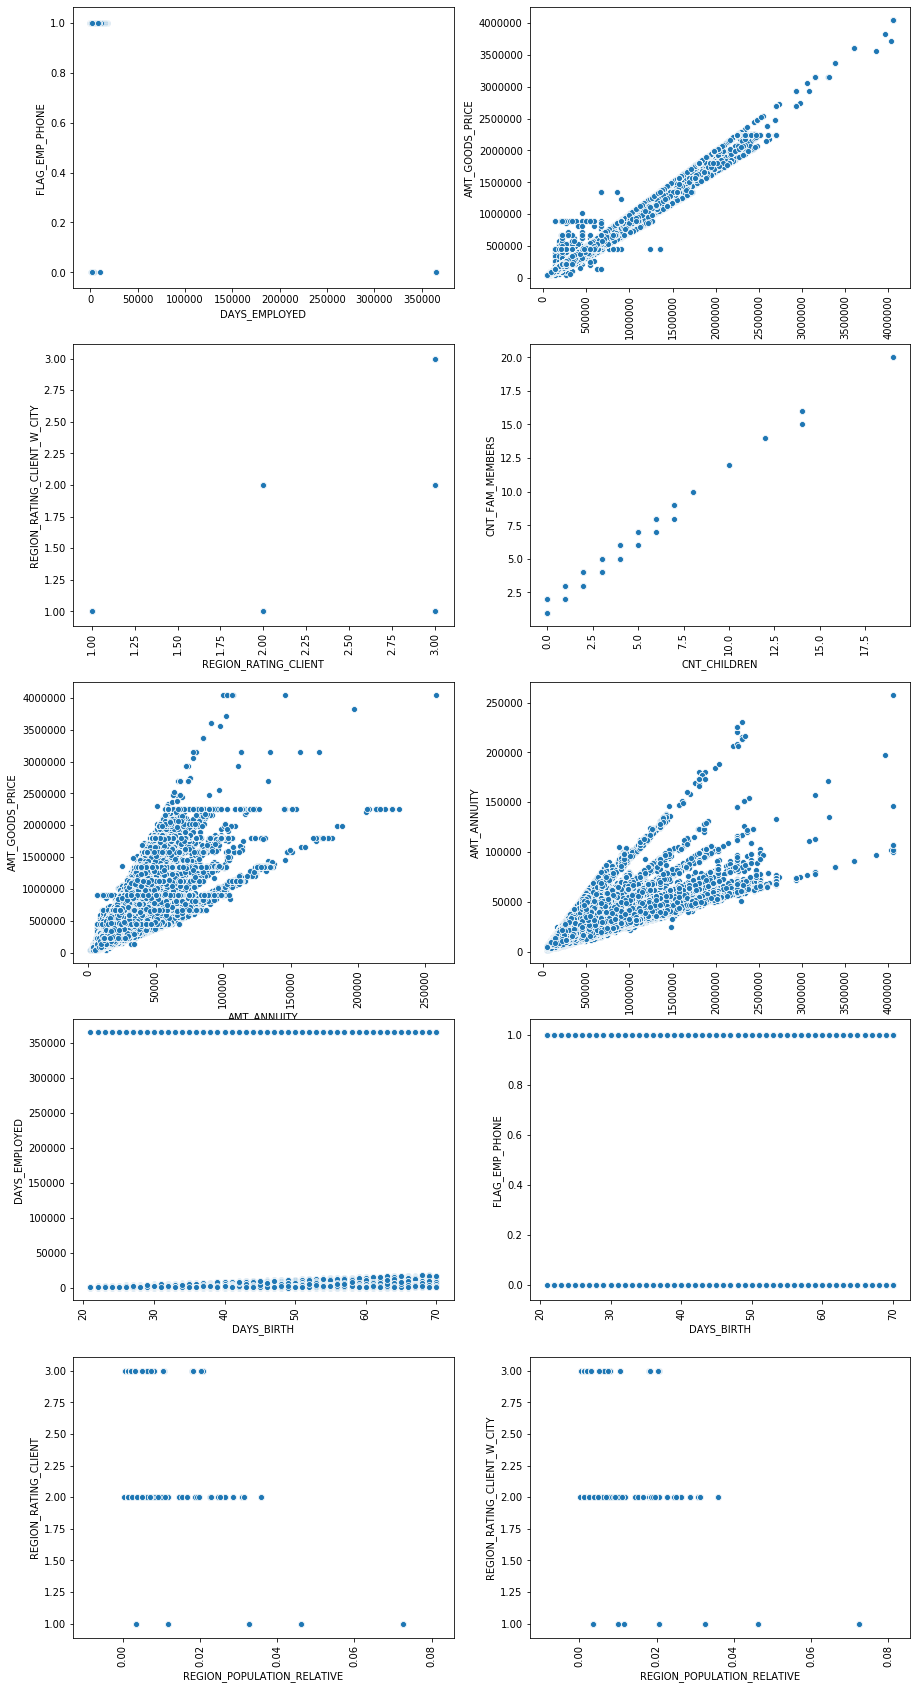

In [55]:
plt.figure(figsize = (15, 30))
plt.subplot(5,2,1)
sns.scatterplot(x='DAYS_EMPLOYED', y='FLAG_EMP_PHONE', data=df_0)

plt.subplot(5,2,2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,3)
sns.scatterplot(x='REGION_RATING_CLIENT', y='REGION_RATING_CLIENT_W_CITY', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,4)
sns.scatterplot(x='CNT_CHILDREN', y='CNT_FAM_MEMBERS', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,5)
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,6)
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,7)
sns.scatterplot(x='DAYS_BIRTH', y='DAYS_EMPLOYED', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,8)
sns.scatterplot(x='DAYS_BIRTH', y='FLAG_EMP_PHONE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,9)
sns.scatterplot(x='REGION_POPULATION_RELATIVE', y='REGION_RATING_CLIENT', data=df_0)
plt.xticks(rotation=90)

plt.subplot(5,2,10)
sns.scatterplot(x='REGION_POPULATION_RELATIVE', y='REGION_RATING_CLIENT_W_CITY', data=df_0)
plt.xticks(rotation=90)


###### Observation:
-   ##### After getting INSIGHT for top 10 corelation below Variables are having top 4 casuation
-   ##### AMT_CREDIT & AMT_GOODS_PRICE are directly proportinal
-   ##### CNT_CHILDREN & CNT_FAM_MEMBERS are directly proportinal
-   ##### AMT_ANNUITY & AMT_GOODS_PRICE are directly proportinal
-   ##### AMT_CREDIT & AMT_ANNUITY are directly proportinal

###### 5.5.4 Visual INSIGHT for top 10 corelation in terms of Defaulter

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ]),
 <a list of 7 Text xticklabel objects>)

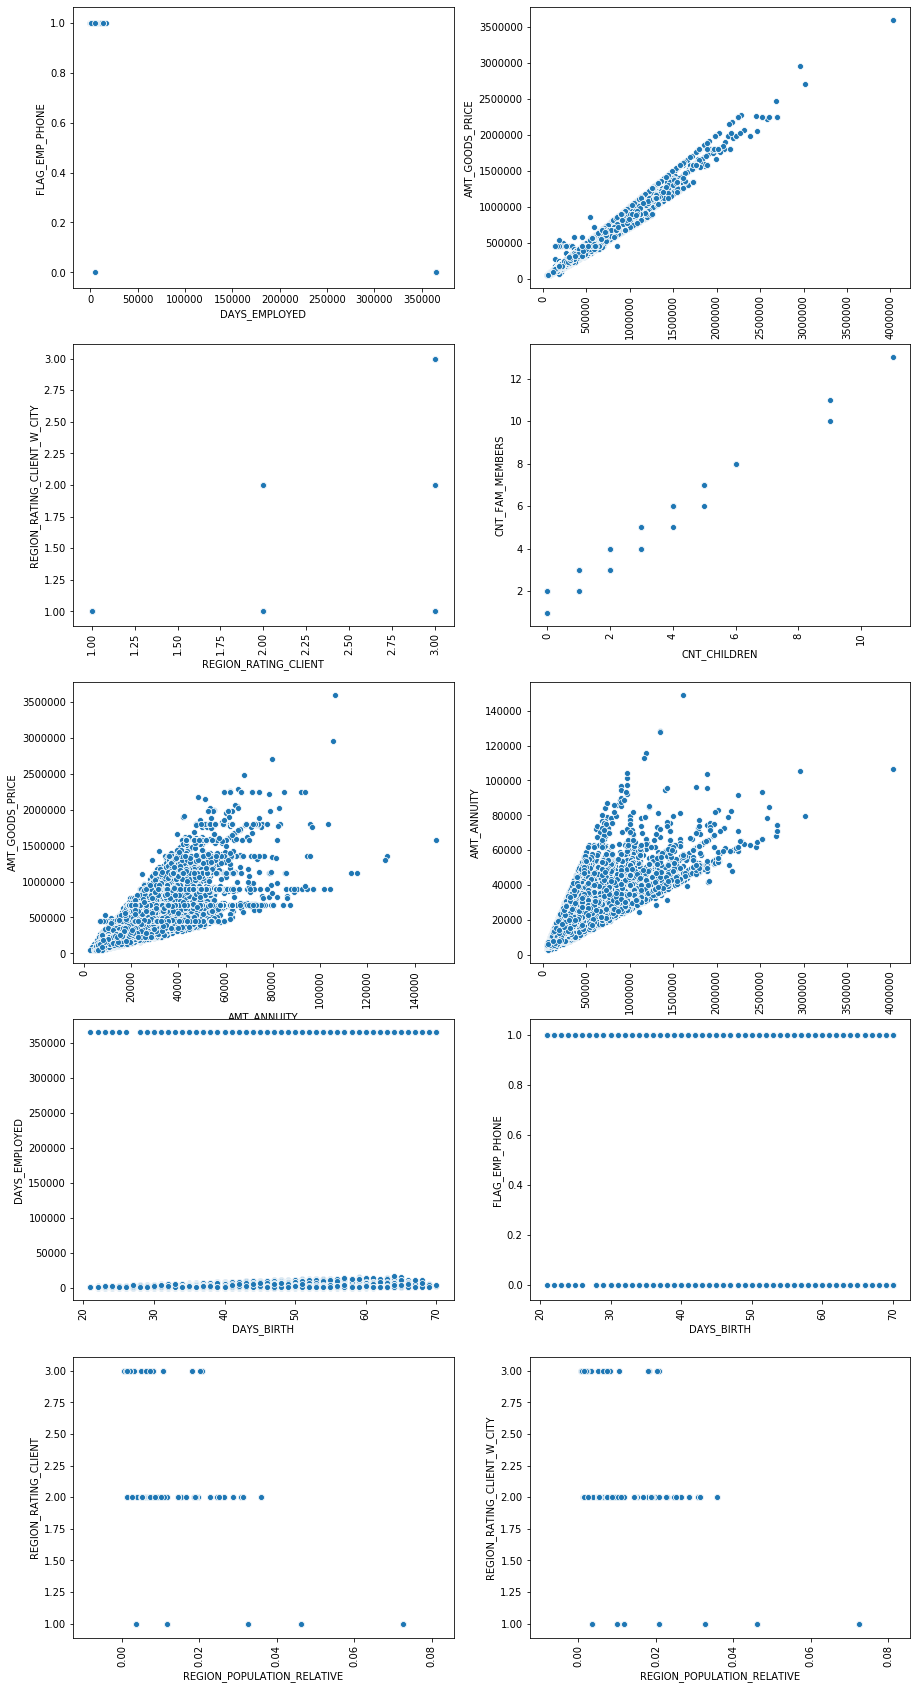

In [56]:
plt.figure(figsize = (15, 30))
plt.subplot(5,2,1)
sns.scatterplot(x='DAYS_EMPLOYED', y='FLAG_EMP_PHONE', data=df_1)

plt.subplot(5,2,2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,3)
sns.scatterplot(x='REGION_RATING_CLIENT', y='REGION_RATING_CLIENT_W_CITY', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,4)
sns.scatterplot(x='CNT_CHILDREN', y='CNT_FAM_MEMBERS', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,5)
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,6)
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,7)
sns.scatterplot(x='DAYS_BIRTH', y='DAYS_EMPLOYED', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,8)
sns.scatterplot(x='DAYS_BIRTH', y='FLAG_EMP_PHONE', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,9)
sns.scatterplot(x='REGION_POPULATION_RELATIVE', y='REGION_RATING_CLIENT', data=df_1)
plt.xticks(rotation=90)

plt.subplot(5,2,10)
sns.scatterplot(x='REGION_POPULATION_RELATIVE', y='REGION_RATING_CLIENT_W_CITY', data=df_1)
plt.xticks(rotation=90)


###### Observation:
-   ##### After getting INSIGHT for top 10 corelation below Variables are having top 4 casuation
-   ##### AMT_CREDIT & AMT_GOODS_PRICE are directly proportinal
-   ##### CNT_CHILDREN & CNT_FAM_MEMBERS are directly proportinal
-   ##### AMT_ANNUITY & AMT_GOODS_PRICE are directly proportinal
-   ##### AMT_CREDIT & AMT_ANNUITY are directly proportinal

### 5.6 Numerical Univariate analysis

###### 5.6.1 Distribution of AMT_CREDIT

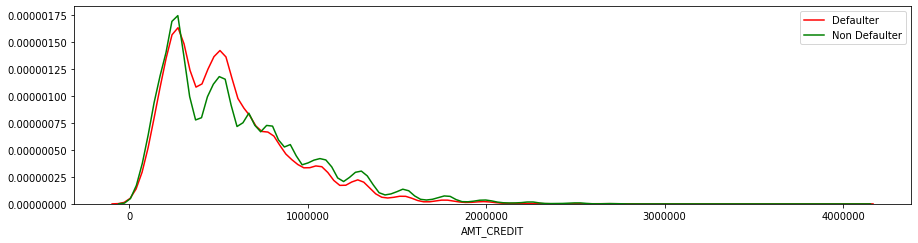

In [57]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['AMT_CREDIT'].dropna(), hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['AMT_CREDIT'].dropna(), hist = False, label = "Non Defaulter", color = 'green')
plt.show()


##### Observation:
- ###### AMT_CREDIT for both defaulter and non defaulter  lies between same interval

###### 5.6.2 Distribution of AMT_ANNUITY

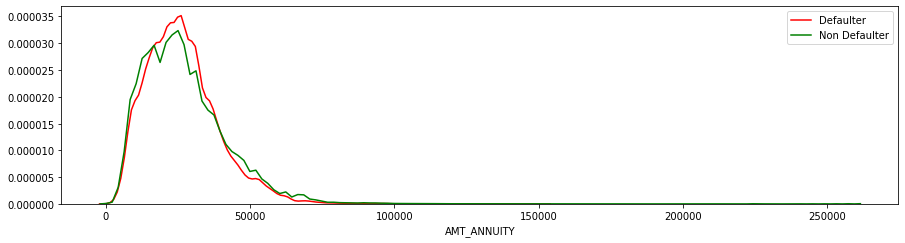

In [58]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['AMT_ANNUITY'].dropna(), hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['AMT_ANNUITY'].dropna(), hist = False, label = "Non Defaulter", color = 'green')
plt.show()


##### Observation:
- ###### AMT_ANNUITY for both defaulter and non defaulter  lies between same interval

###### 5.6.3 Distribution of AMT_GOODS_PRICE with respect to TARGET

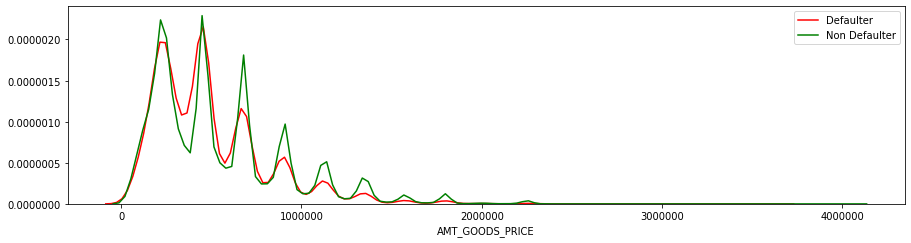

In [59]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['AMT_GOODS_PRICE'].dropna(), hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['AMT_GOODS_PRICE'].dropna(), hist = False, label = "Non Defaulter", color = 'green')
plt.show()

##### Observation:
- ###### AMT_GOODS_PRICE for both defaulter and non defaulter  lies between same interval

###### 5.6.4 Distribution of Age with respect to TARGET

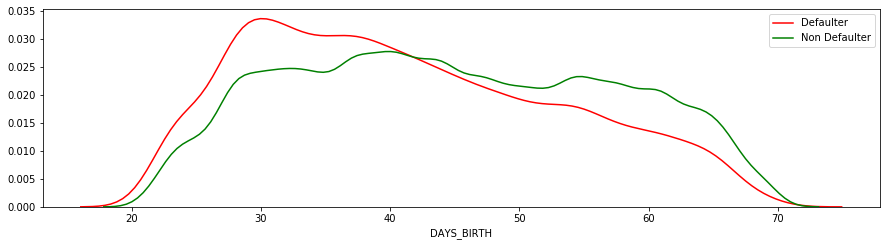

In [60]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['DAYS_BIRTH'].dropna(), hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['DAYS_BIRTH'].dropna(), hist = False, label = "Non Defaulter", color = 'green')
plt.show()


##### Observation:
- ###### Age of most of the people for defaulter lies between 21 to 45
- ###### Age of most of the people for non defaulter lies between 21 to 60

### 5.7 Numerical Bivariate analysis

###### TARGET v/s DAYS_BIRTH

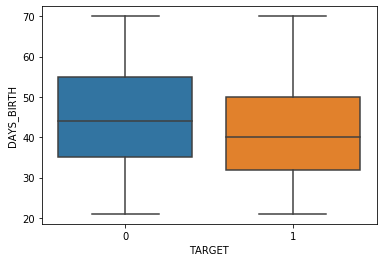

In [61]:
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=df_application)
plt.show()

###### Observation
- ###### Mean for non defaulters is more than Defaulter
- ###### Younger applicants face more payment difficulties, compared to older ones

###### EXT_SOURCE_2 v/s TARGET

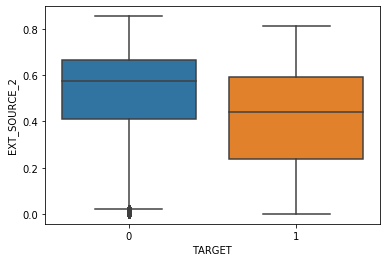

In [62]:
sns.boxplot(x='TARGET', y = 'EXT_SOURCE_2', data=df_application)
plt.show()

###### Observation
- ######  Applicants with higher score have less payment difficulties